In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects

import os
import sys

from IPython import get_ipython
from IPython.display import display
# %%

import logging
import datetime
from scipy import stats
from tabulate import tabulate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# configure logging
logging.basicConfig(filename='app.log', # you can specify a log file
                    filemode='w',
                    level=logging.DEBUG, # Set the log level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
                    format='%(asctime)s - %(levelname)s - %(message)s') # format of the log message

In [ ]:
logger = logging.getLogger('My_logger')

In [ ]:
# Start logging in your project
def load_data(file_path='/content/train.csv'):
  logging.info("Loading data from file: %s", file_path)
  try:
    data = pd.read_csv('/content/train.csv')
    logging.info("Data loaded successfully from %s", file_path)
    return data
  except Exception as e:
    logging.error("Error loading data from file: %s", file_path)
    logging.exception("Exception occurred", exc_info=True)
    return None
    data = pd.read_csv('/content/train.csv')
    logging.info("Data loaded successfully from %s", file_path)
    return data
  except Exception as e:
        logging.error("Error loading data from file: %s", file_path)
        logging.exception("Exception occurred", exc_info=True)
        return None

# Load the Train.csv data

In [ ]:
train_data = pd.read_csv('/content/train.csv')

In [ ]:
train_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [ ]:
train_data.tail(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
train_data.shape

(1017209, 9)

In [ ]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
train_data.isnull().sum() # missing value cheking

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# filling missng values
train_data = train_data.fillna(0)

In [ ]:
train_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
numerical = [] # Initialize as empty lists
categorical = []
timestamps = [] # Renamed to avoid conflict with the Index variable

for col in train_data.columns:
    if train_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif train_data[col].dtype == object:
        categorical.append(col)
    # Check for datetime64 dtype for timestamp columns
    elif train_data[col].dtype == 'datetime64[ns]': # Assuming datetime columns are of this dtype
        timestamps.append(col)
    else:
        # You might want to handle other dtypes here or log a warning
        print(f"Column {col} has an unhandled dtype: {train_data[col].dtype}")


# Now, numerical, categorical, and timestamps are lists of column names (strings)
# You can then use these lists to select columns from the DataFrame
features = numerical + categorical + timestamps
train_data = train_data[features]
train_data.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday
0,1,5,5263,555,1,1,1,2015-07-31,0
1,2,5,6064,625,1,1,1,2015-07-31,0
2,3,5,8314,821,1,1,1,2015-07-31,0


In [ ]:
# change the date col to a timestamp feature
# Use errors='coerce' to handle potential parsing errors and convert them to NaT
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%Y-%m-%d', errors='coerce')

# Load the Test data

In [ ]:
test_data = pd.read_csv('/content/test.csv')
test_data.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [ ]:
test_data.tail(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
test_data.isnull().sum() # this dataset in a missing value 11

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# FILL THE MISSING VALUES by useing mean
test_data['Open'].fillna(test_data['Open'].mean(), inplace=True)

In [ ]:
test_data.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
test_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,41088.0,NaN,NaN,NaN,20544.5,11861.228267,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,NaN,NaN,NaN,555.899533,320.274496,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,NaN,NaN,NaN,3.979167,2.015481,1.0,2.0,4.0,6.0,7.0
Date,41088,48,2015-09-17,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,41088.0,NaN,NaN,NaN,0.854322,0.35274,0.0,1.0,1.0,1.0,1.0
Promo,41088.0,NaN,NaN,NaN,0.395833,0.489035,0.0,0.0,0.0,1.0,1.0
StateHoliday,41088,2,0,40908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,41088.0,NaN,NaN,NaN,0.443487,0.496802,0.0,0.0,0.0,1.0,1.0


In [ ]:
test_data.duplicated().sum()

np.int64(0)

In [ ]:
test_data.shape

(41088, 8)

In [ ]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

# looping

In [ ]:
numerical = []
catagorical = []
timestamps =  []

for col in test_data.columns:
  if test_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
    numerical.append(col)
  elif test_data[col].dtype == object:
      catagorical.append(col)
      # Assuming datetime columns might exist in test_data
  elif test_data[col].dtype == 'datetime64[ns]':
        timestamps.append(col)
  else:
        # Handle other dtype if neccersry
        print(f"Column {col} has an unhandled dtype: {test_data[col].dtype}")
test_data = test_data[numerical+catagorical+timestamps]
test_data.head(3)


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Date,StateHoliday
0,1,1,4,1.0,1,0,2015-09-17,0
1,2,3,4,1.0,1,0,2015-09-17,0
2,3,7,4,1.0,1,0,2015-09-17,0


# **Loading the dataset Store.csv**

In [ ]:
store_data = pd.read_csv('/content/store.csv')
store_data.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
store_data.tail(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
#total missing values
store_data.isnull().sum().sum()

np.int64(2343)

2343 is total missing values

In [ ]:
# now filling the missing values by useing method fillna
store_data = store_data.fillna(0)

In [ ]:
store_data.count(0)/store_data.shape[0] * 100

,0
Store,100.0
StoreType,100.0
Assortment,100.0
CompetitionDistance,100.0
CompetitionOpenSinceMonth,100.0
CompetitionOpenSinceYear,100.0
Promo2,100.0
Promo2SinceWeek,100.0
Promo2SinceYear,100.0
PromoInterval,100.0


In [ ]:
store_data.describe() # describe value in the set

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_data.duplicated().sum() # checking the duplicate value in dataset

np.int64(0)

In [ ]:
store_data.shape

(1115, 10)

In [ ]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# filling missing value in numerical in median
numerical_cols = store_data.select_dtypes(include=['float64', 'int64']).columns
store_data[numerical_cols] = store_data[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)


In [ ]:
#filling missing value catagorial in mode
categorical_cols = store_data.select_dtypes(include=['object']).columns
store_data[categorical_cols] = store_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

In [ ]:
# filling catagorical missing value in unknown
catagorical_cols = store_data.select_dtypes(include=['object']).columns
store_data[catagorical_cols] = store_data[catagorical_cols].apply(lambda x: x.fillna('unknown'))

In [ ]:
# checking the missing values
store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


# ** Looping**

In [ ]:
numerical = []
catagorical =[]
timestamps = []

for col in store_data.columns:
  if store_data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
    numerical.append(col)
  elif store_data[col].dtype ==object:
      catagorical.append(col)
      #assuming datetime might exist in store_data
  elif store_data[col].dtype == 'datetime64[ns]':
      timestamps.append(col)

  else:
    # Hanlde other dtypes if necessary
      print(f"Column {col} has an unhandled dtype: {store_data[col].dtype}")
store_data = store_data[numerical+catagorical+timestamps]
store_data.head(3)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,1270.0,9.0,2008.0,0,0.0,0.0,c,a,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"


In [ ]:
store_data.dtypes

,0
Store,int64
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
StoreType,object
Assortment,object
PromoInterval,object


In [ ]:
store_data.nunique

<bound method DataFrame.nunique of       Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0         1               1270.0                        9.0   
1         2                570.0                       11.0   
2         3              14130.0                       12.0   
3         4                620.0                        9.0   
4         5              29910.0                        4.0   
...     ...                  ...                        ...   
1110   1111               1900.0                        6.0   
1111   1112               1880.0                        4.0   
1112   1113               9260.0                        0.0   
1113   1114                870.0                        0.0   
1114   1115               5350.0                        0.0   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                       2008.0       0              0.0              0.0   
1                       2007.0       1             13.0           2010.0   
2                       2006.0       1             14.0           2011.0   
3                       2009.0       0              0.0              0.0   
4                       2015.0       0              0.0              0.0   
...                        ...     ...              ...              ...   
1110                    2014.0       1             31.0           2013.0   
1111                    2006.0       0              0.0              0.0   
1112                       0.0       0              0.0              0.0   
1113                       0.0       0              0.0              0.0   
1114                       0.0       1             22.0           2012.0   

     StoreType Assortment     PromoInterval  
0            c          a                 0  
1            a          a   Jan,Apr,Jul,Oct  
2            a          a   Jan,Apr,Jul,Oct  
3            c          c                 0  
4            a          a                 0  
...        ...        ...               ...  
1110         a          a   Jan,Apr,Jul,Oct  
1111         c          c                 0  
1112         a          c                 0  
1113         a          c                 0  
1114         d          c  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]>

In [ ]:
# known the our dataset shape
logger = logging.getLogger('My_logger')
print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of test_data: {test_data.shape}")
print(f"Shape of store_data: {store_data.shape}")

Shape of train_data: (1017209, 9)
Shape of test_data: (41088, 8)
Shape of store_data: (1115, 10)


In [ ]:
## Dealing with cardinality
train_data['StateHoliday'].replace({'0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)



# Mergeing the data Store.csv and train.csv

In [ ]:
# Example of merging
train_data_merged = pd.merge(train_data, store_data, on='Store', how='left')
train_data_merged.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,5,5263,555,1,1,1,2015-07-31,o,1270.0,9.0,2008.0,0,0.0,0.0,c,a,0
1,2,5,6064,625,1,1,1,2015-07-31,o,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,1,2015-07-31,o,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"


In [ ]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   SchoolHoliday              1017209 non-null  int64         
 7   Date                       1017209 non-null  datetime64[ns]
 8   StateHoliday               1017209 non-null  object        
 9   CompetitionDistance        1017209 non-null  float64       
 10  CompetitionOpenSinceMonth  1017209 non-null  float64       
 11  CompetitionOpenSinceYear   1017209 no

# PreProcessing

In [ ]:
train_data_merged.isnull().sum()

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
SchoolHoliday,0
Date,0
StateHoliday,0
CompetitionDistance,0


In [ ]:
train_data_merged = train_data_merged.fillna(0)

In [ ]:
train_data_merged.isnull().sum()

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
SchoolHoliday,0
Date,0
StateHoliday,0
CompetitionDistance,0


In [ ]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   SchoolHoliday              1017209 non-null  int64         
 7   Date                       1017209 non-null  datetime64[ns]
 8   StateHoliday               1017209 non-null  object        
 9   CompetitionDistance        1017209 non-null  float64       
 10  CompetitionOpenSinceMonth  1017209 non-null  float64       
 11  CompetitionOpenSinceYear   1017209 no

In [ ]:
train_data_merged.duplicated().sum()

np.int64(0)

In [ ]:
train_data_merged.shape

(1017209, 18)

In [ ]:
train_data_merged.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Date', 'StateHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType', 'Assortment',
       'PromoInterval'],
      dtype='object')

In [ ]:
train_data_merged.drop_duplicates(inplace=True)

In [ ]:
train_data_merged.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
CompetitionDistance,1017209.0,5415.982074,0.0,700.0,2320.0,6880.0,75860.0,7710.252708
CompetitionOpenSinceMonth,1017209.0,4.926878,0.0,0.0,4.0,9.0,12.0,4.283543


In [ ]:
train_data_merged.describe(include='object')

,StateHoliday,StoreType,Assortment,PromoInterval
count,1017209,1017209,1017209,1017209
unique,5,4,3,4
top,o,a,a,0
freq,855087,551627,537445,508031


In [ ]:
train_data_merged.describe(percentiles=[])

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2014-04-11 01:30:42.846061824,5.415982e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2014-04-02 00:00:00,2.320000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2015-07-31 00:00:00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,NaN,7.710253e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


In [ ]:
train_data_merged.describe(include='all')

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1017209,1017209.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,NaN,NaN,NaN,NaN,NaN,NaN,a,a,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855087,NaN,NaN,NaN,NaN,NaN,NaN,551627,537445,508031.0
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2014-04-11 01:30:42.846061824,NaN,5.415982e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2013-01-01 00:00:00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2013-08-17 00:00:00,NaN,7.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2014-04-02 00:00:00,NaN,2.320000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,NaN,NaN,NaN
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2014-12-12 00:00:00,NaN,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,NaN,NaN,NaN
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2015-07-31 00:00:00,NaN,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,NaN,NaN,NaN


In [ ]:
stand_num = train_data_merged.describe(include=['int64','float64'])
stand_num

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [ ]:
#calculate range for each numeric variable
range_num_data= stand_num.max()-stand_num.min()
range_num_data

,0
Store,1017208.0
DayOfWeek,1017208.0
Sales,1017209.0
Customers,1017209.0
Open,1017209.0
Promo,1017209.0
SchoolHoliday,1017209.0
CompetitionDistance,1017209.0
CompetitionOpenSinceMonth,1017209.0
CompetitionOpenSinceYear,1017209.0


# Looping

In [ ]:
# Identify column types
numerical = []
categorical = []
timestamps = []

for col in train_data_merged.columns:
    if train_data_merged[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif train_data_merged[col].dtype == 'object':
        categorical.append(col)
    elif train_data_merged[col].dtype == 'datetime64[ns]':
        timestamps.append(col)
    else:
        print(f"Column {col} has an unhandled dtype: {train_data_merged[col].dtype}")

# Reorder DataFrame with type-based columns
train_data_merged= train_data_merged[numerical + categorical + timestamps]

# Preview
train_data_merged.head(3)
#train_data_merged.shape


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StateHoliday,StoreType,Assortment,PromoInterval,Date
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,o,c,a,0,2015-07-31
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,o,a,a,"Jan,Apr,Jul,Oct",2015-07-31
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,o,a,a,"Jan,Apr,Jul,Oct",2015-07-31


# outlier find

In [ ]:
# Function for detecting outliers in our numerical variable data useing boxplots
def plot_outliers(dataFrame, Vars_names):
  fig, ax = plt.subplots(len(Vars_names), figsize = (7,30))
  for i, var in enumerate(Vars_names): # Corrected capitalization
    sns.boxplot(y = dataFrame[var],ax = ax[i]) # Corrected capitalization
    ax[i].set_title('Box plot - {}'.format(var), fontsize = 10) # Corrected capitalization
    ax[i].set_xlabel(var, fontsize = 8) # Corrected capitalization
  plt.show()


# a function for replacing outliers with the median, used there's too many outliers in a features
# Moved this function definition outside of plot_outliers
def replace_outlier_with_median(dataFrame, feature):
  Q1 = dataFrame[feature].quantile(0.25)
  Q3 = dataFrame[feature].quantile(0.75)
  median = dataFrame[feature].quantile(0.50)

  IQR = Q3-Q1

  upper_whisker = Q3 +(1.5*IQR)
  lower_whisker = Q1 - (1.5*IQR)

  dataFrame[feature]=np.where(dataFrame[feature]>upper_whisker,median,dataFrame[feature])
  dataFrame[feature]=np.where(dataFrame[feature]<lower_whisker,median,dataFrame[feature])

In [ ]:
# Loop through all numeric columns and replace outliers
def replace_outliers_all_numeric(dataFrame):
    numerical_cols = dataFrame.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for feature in numerical_cols:
        replace_outlier_with_median(dataFrame, feature)
        print(f"Outliers handled for: {feature}")


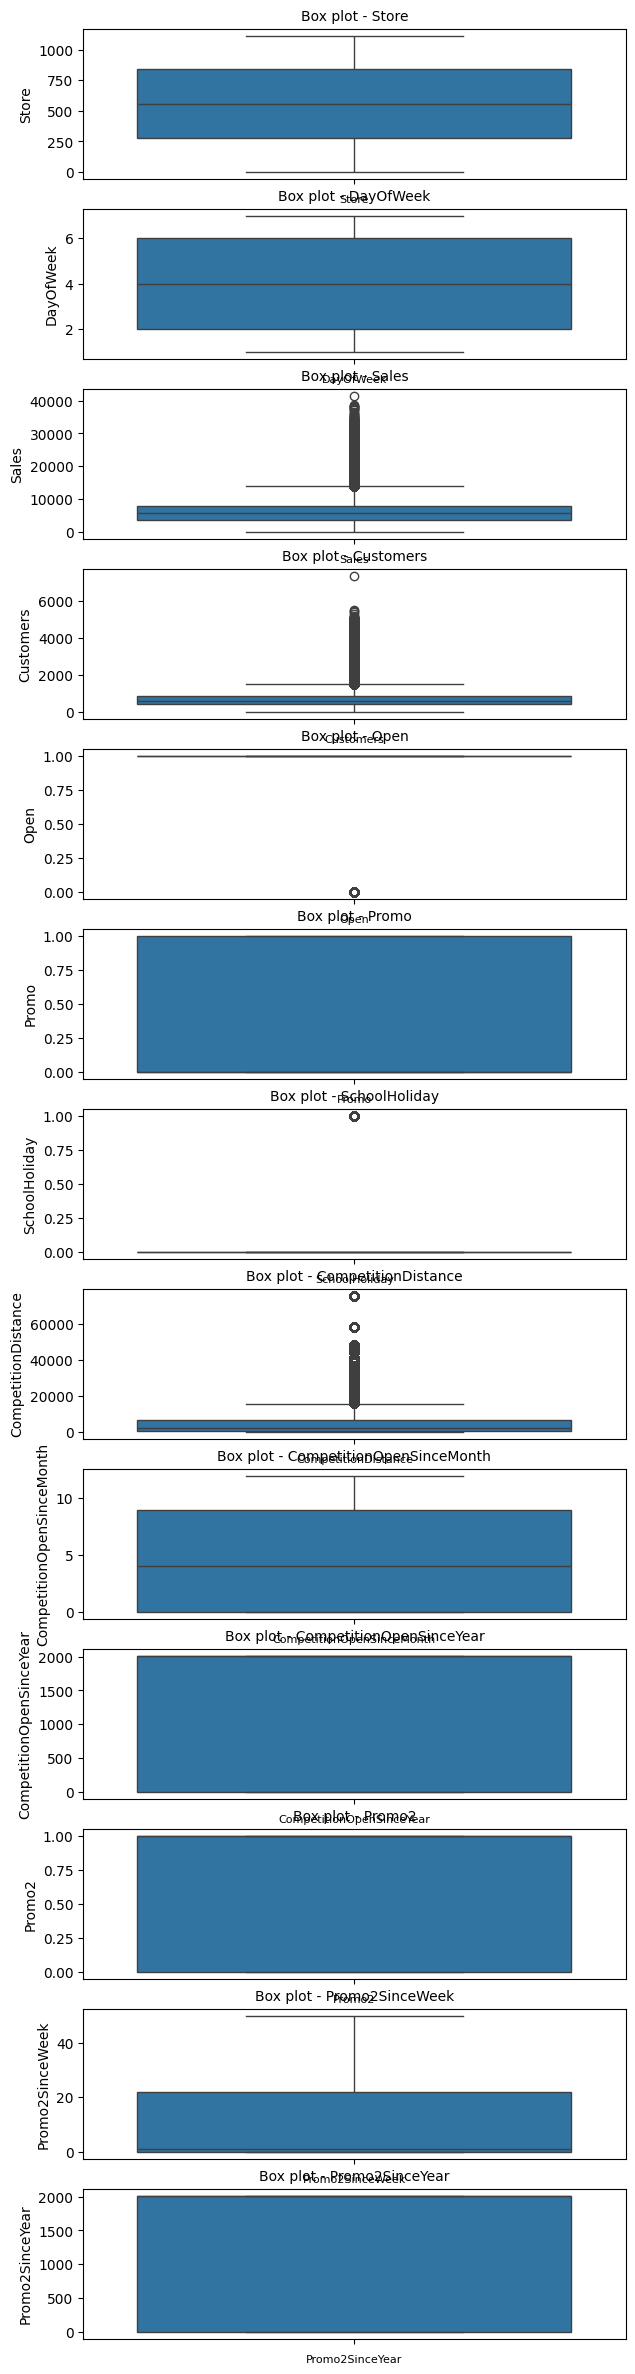

Outliers handled for: Store
Outliers handled for: DayOfWeek
Outliers handled for: Sales
Outliers handled for: Customers
Outliers handled for: Open
Outliers handled for: Promo
Outliers handled for: SchoolHoliday
Outliers handled for: CompetitionDistance
Outliers handled for: CompetitionOpenSinceMonth
Outliers handled for: CompetitionOpenSinceYear
Outliers handled for: Promo2
Outliers handled for: Promo2SinceWeek
Outliers handled for: Promo2SinceYear


In [ ]:
# Example usage on merged dataset
numerical_columns = train_data_merged.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 1: Plot boxplots to detect
plot_outliers(train_data_merged, numerical_columns)

# Step 2: Replace outliers
replace_outliers_all_numeric(train_data_merged)


In [ ]:
train_data_merged.Sales.describe()


,Sales
count,1.017209e+06
mean,5.472856e+03
std,3.323989e+03
min,0.000000e+00
25%,3.727000e+03
50%,5.744000e+03
75%,7.584000e+03
max,1.404900e+04


In [ ]:
train_data_merged = train_data_merged.drop(train_data_merged[(train_data_merged.Open ==1)& (train_data_merged.Sales ==0)].index)
train_data_merged = train_data_merged.reset_index(drop=True)


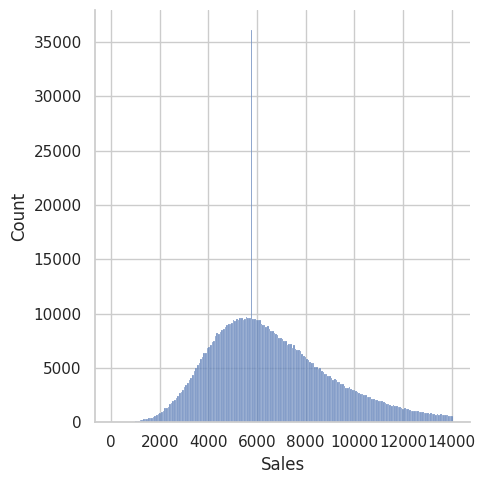

In [ ]:
# Find the range of data
plt.figsize=(5,10)
sns.set(style="whitegrid")
sns.displot(train_data_merged["Sales"])

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

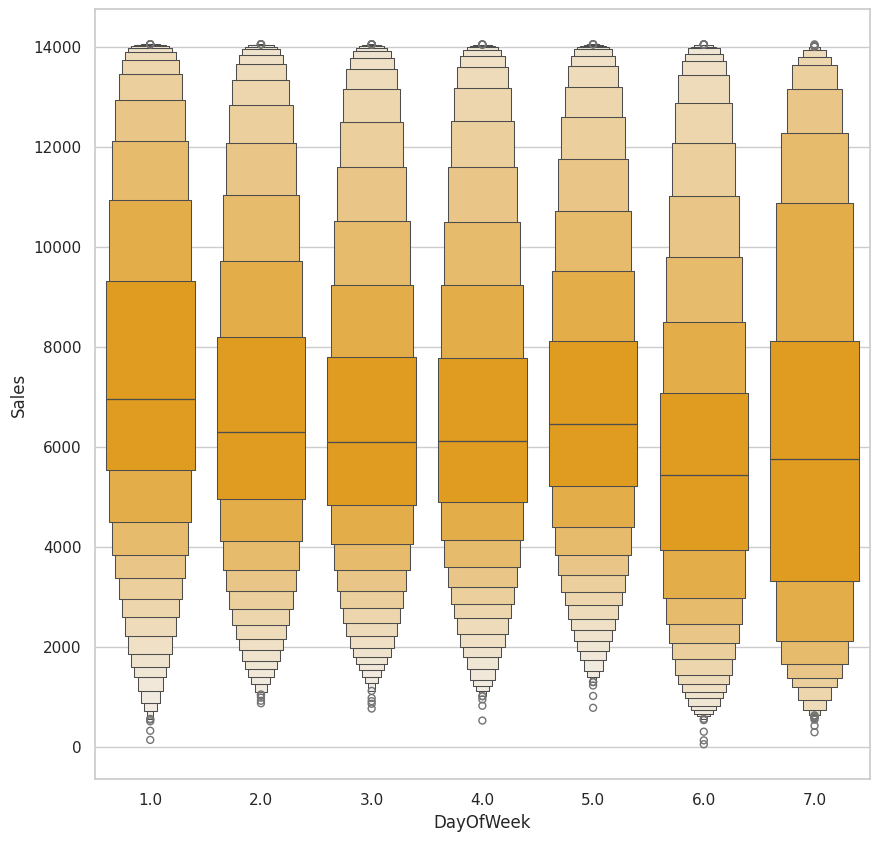

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=train_data_merged,scale="linear",x="DayOfWeek",y="Sales",color="orange")

In [ ]:
train_data_merged.Customers.describe()

,Customers
count,844338.000000
mean,696.761388
std,252.374850
min,8.000000
25%,519.000000
50%,646.000000
75%,843.000000
max,1485.000000


# merging the store.csv and test.csv

In [ ]:
test_data_merged = pd.merge(test_data, store_data, on='Store', how='left')
test_data_merged.head(3)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Date,StateHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,1,4,1.0,1,0,2015-09-17,o,1270.0,9.0,2008.0,0,0.0,0.0,c,a,0
1,2,3,4,1.0,1,0,2015-09-17,o,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"
2,3,7,4,1.0,1,0,2015-09-17,o,24000.0,4.0,2013.0,0,0.0,0.0,a,c,0


In [ ]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   SchoolHoliday              41088 non-null  int64  
 6   Date                       41088 non-null  object 
 7   StateHoliday               41088 non-null  object 
 8   CompetitionDistance        41088 non-null  float64
 9   CompetitionOpenSinceMonth  41088 non-null  float64
 10  CompetitionOpenSinceYear   41088 non-null  float64
 11  Promo2                     41088 non-null  int64  
 12  Promo2SinceWeek            41088 non-null  float64
 13  Promo2SinceYear            41088 non-null  flo

In [ ]:
test_data_merged.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Open,0
Promo,0
SchoolHoliday,0
Date,0
StateHoliday,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0


In [ ]:
test_data_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,41088.0,20544.500000,11861.228267,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,555.899533,320.274496,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,3.979167,2.015481,1.0,2.00,4.0,6.00,7.0
Open,41088.0,0.854322,0.352740,0.0,1.00,1.0,1.00,1.0
Promo,41088.0,0.395833,0.489035,0.0,0.00,0.0,1.00,1.0
SchoolHoliday,41088.0,0.443487,0.496802,0.0,0.00,0.0,1.00,1.0
CompetitionDistance,41088.0,5076.693925,7221.221850,0.0,710.00,2410.0,6435.00,75860.0
CompetitionOpenSinceMonth,41088.0,4.429907,4.214484,0.0,0.00,4.0,9.00,12.0
CompetitionOpenSinceYear,41088.0,1264.787383,969.984740,0.0,0.00,2005.0,2011.00,2015.0
Promo2,41088.0,0.580607,0.493466,0.0,0.00,1.0,1.00,1.0


In [ ]:
test_data_merged.duplicated().sum()

np.int64(0)

In [ ]:
test_data_merged.dtypes

,0
Id,int64
Store,int64
DayOfWeek,int64
Open,float64
Promo,int64
SchoolHoliday,int64
Date,object
StateHoliday,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64


In [ ]:
test_data_merged.shape

(41088, 17)

In [ ]:
test_data_merged.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Date',
       'StateHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType', 'Assortment', 'PromoInterval'],
      dtype='object')

# **looping**

In [ ]:
 #Identify column types
numerical = []
categorical = []
timestamps = []

for col in test_data_merged.columns:
    if test_data_merged[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif test_data_merged[col].dtype == 'object':
        categorical.append(col)
    elif test_data_merged[col].dtype == 'datetime64[ns]':
        timestamps.append(col)
    else:
        print(f"Column {col} has an unhandled dtype: {train_data_merged[col].dtype}")

# Reorder DataFrame with type-based columns
test_data_merged= test_data_merged[numerical + categorical + timestamps]

# Preview
test_data_merged.head(3)


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,1,1,4,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,2015-09-17,o,c,a,0
1,2,3,4,1.0,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,2015-09-17,o,a,a,"Jan,Apr,Jul,Oct"
2,3,7,4,1.0,1,0,24000.0,4.0,2013.0,0,0.0,0.0,2015-09-17,o,a,c,0


**Find** **the** **outliers**

In [ ]:
# File: ipython-input-67-1620315727

# Function for detecting outliers in our numerical variable data useing boxplots
def plot_outliers(dataFrame, Vars_names):
  fig, ax = plt.subplots(len(Vars_names), figsize = (7,30))
  for i, var in enumerate(Vars_names): # Corrected capitalization
    sns.boxplot(y = dataFrame[var],ax = ax[i]) # Corrected capitalization
    ax[i].set_title('Box plot - {}'.format(var), fontsize = 10) # Corrected capitalization
    ax[i].set_xlabel(var, fontsize = 8) # Corrected capitalization
  plt.show()


# a function for replacing outliers with the median, used there's too many outliers in a features
# Moved this function definition outside of plot_outliers
def replace_outlier_with_median(dataFrame, feature):
  Q1 = dataFrame[feature].quantile(0.25)
  Q3 = dataFrame[feature].quantile(0.75)
  median = dataFrame[feature].quantile(0.50)

  IQR = Q3-Q1

  upper_whisker = Q3 +(1.5*IQR)
  lower_whisker = Q1 - (1.5*IQR)

  dataFrame[feature]=np.where(dataFrame[feature]>upper_whisker,median,dataFrame[feature])
  dataFrame[feature]=np.where(dataFrame[feature]<lower_whisker,median,dataFrame[feature])

In [ ]:
# File: ipython-input-68-1030757588

# Loop through all numeric columns and replace outliers
def replace_outliers_all_numeric(dataFrame):
    numerical_cols = dataFrame.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for feature in numerical_cols:
        replace_outlier_with_median(dataFrame, feature) # Now replace_outlier_with_median is accessible
        print(f"Outliers handled for: {feature}")

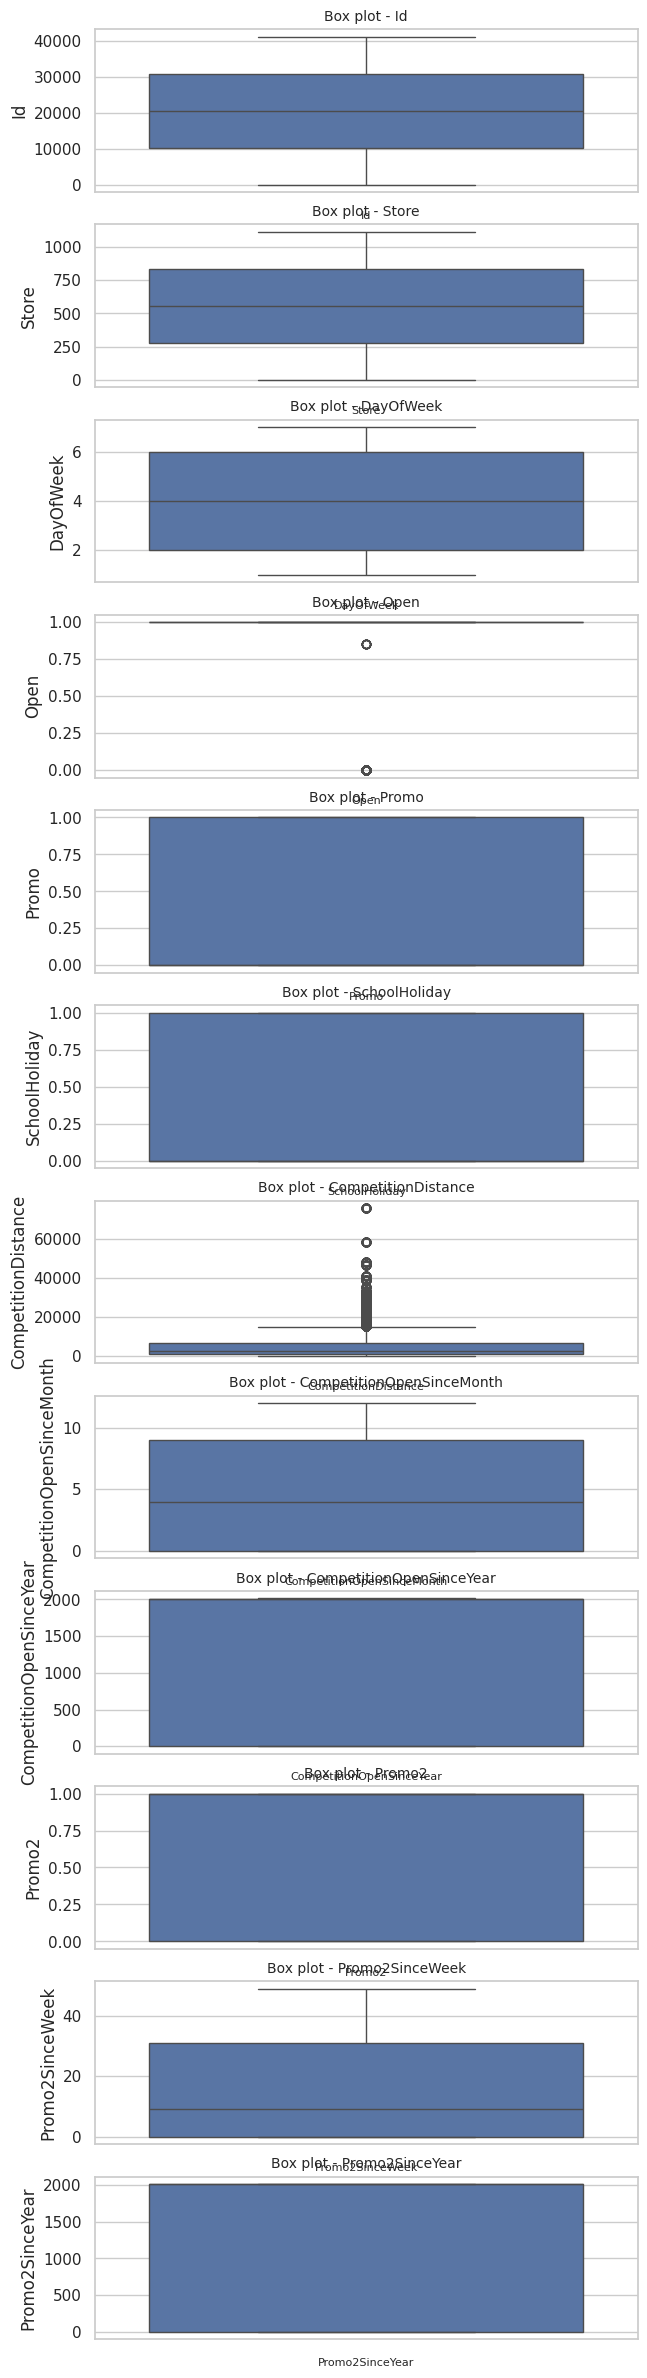

Outliers handled for: Id
Outliers handled for: Store
Outliers handled for: DayOfWeek
Outliers handled for: Open
Outliers handled for: Promo
Outliers handled for: SchoolHoliday
Outliers handled for: CompetitionDistance
Outliers handled for: CompetitionOpenSinceMonth
Outliers handled for: CompetitionOpenSinceYear
Outliers handled for: Promo2
Outliers handled for: Promo2SinceWeek
Outliers handled for: Promo2SinceYear


In [ ]:
# File: ipython-input-69-1620315727

# Example usage on merged dataset
numerical_columns = test_data_merged.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 1: Plot boxplots to detect
plot_outliers(test_data_merged, numerical_columns)

# Step 2: Replace outliers
replace_outliers_all_numeric(test_data_merged)

In [ ]:
test_data_merged.shape

(41088, 17)

In [ ]:
train_data_merged.shape

(844338, 18)

#  EDA merged data for train.csv and store.csv

task 1. Check for distribution in both training and test sets - are the promotions
distributed similarly between these two groups?

In [ ]:
#Answer Each Question with Visuals ===
os.makedirs("plots", exist_ok=True)


Training set promotion distribution:
 Promo
0.0    0.553644
1.0    0.446356
Name: proportion, dtype: float64

Test set promotion distribution:
 Promo
0.0    0.604167
1.0    0.395833
Name: proportion, dtype: float64


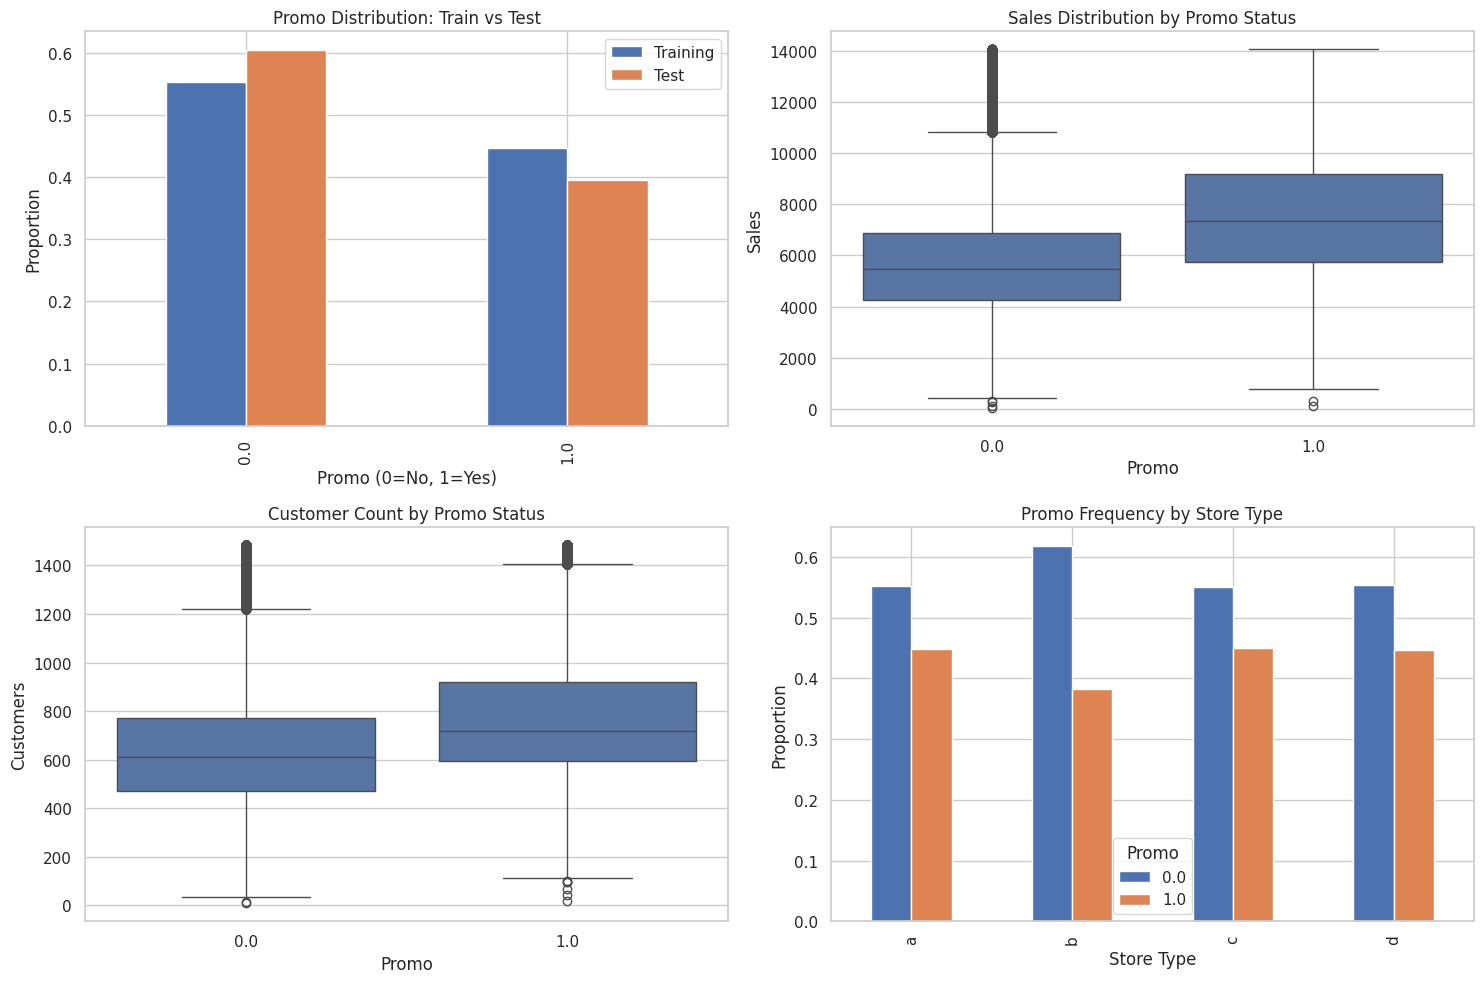

Promo rate in training: 0.446
Promo rate in test: 0.396
Difference: 0.051


In [ ]:
# Promo distribution in train vs test
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

train_promo = train_data_merged['Promo'].value_counts(normalize=True)
test_promo = test_data_merged['Promo'].value_counts(normalize=True)

# You might want to print or display these values to see the distribution
print("Training set promotion distribution:\n", train_promo)
print("\nTest set promotion distribution:\n", test_promo)

# Plot 1: Promo distribution comparison
promo_comparison = pd.DataFrame({
            'Training': train_promo,
            'Test': test_promo
        })
# Ensure correct axes index is used if combining plots
promo_comparison.plot(kind='bar', ax=axes[0,0], title='Promo Distribution: Train vs Test')
axes[0,0].set_ylabel('Proportion')
axes[0,0].set_xlabel('Promo (0=No, 1=Yes)')


# Plot 2: Promo effect on sales
sns.boxplot(data=train_data_merged, x='Promo', y='Sales', ax=axes[0,1])
axes[0,1].set_title('Sales Distribution by Promo Status')

 # Plot 3: Promo effect on customers
sns.boxplot(data=train_data_merged, x='Promo', y='Customers', ax=axes[1,0])
axes[1,0].set_title('Customer Count by Promo Status')

# Plot 4: Promo frequency by store type
promo_store = pd.crosstab(train_data_merged['StoreType'], train_data_merged['Promo'], normalize='index')
promo_store.plot(kind='bar', ax=axes[1,1], title='Promo Frequency by Store Type')
axes[1,1].set_ylabel('Proportion')
axes[1,1].set_xlabel('Store Type') # Added xlabel for clarity


plt.tight_layout()
plt.show() # This will now display the complete 2x2 grid of plots


 # Statistical tests
train_promo_rate = train_data_merged['Promo'].mean()
test_promo_rate = test_data_merged['Promo'].mean()
print(f"Promo rate in training: {train_promo_rate:.3f}")
print(f"Promo rate in test: {test_promo_rate:.3f}")
print(f"Difference: {abs(train_promo_rate - test_promo_rate):.3f}")

logger.info("Promotion distribution analysis completed")

# 1. Promo Distribution in Train vs Test Sets
The proportion of promo days (Promo = 1) is higher in the training dataset compared to the test dataset.

This slight imbalance suggests the model may see fewer promo cases during testing, potentially impacting performance if promo impact is significant.

# 2. Sales vs Promo Status
Median sales are significantly higher on promotional days.

The distribution is wider for Promo = 1, indicating a greater variance and potential for higher revenue.

Conclusion: Promotions play a vital role in boosting sales, and this feature is important for prediction.

# 3. Customer Count vs Promo Status
Promotional days consistently show higher customer counts.

Median and interquartile range are both elevated when Promo = 1, confirming that promotions help attract more customers.

# 4. Promo Frequency by Store Type
Store Type 'b' shows the lowest usage of promotions, whereas other store types ('a', 'c', 'd') show more balanced promo usage.

This suggests that store-level promo strategies vary, and store type should be considered when analyzing or predicting promo impact.

# Key Insights:
Promotions are a strong driver of both sales and customer traffic.

The imbalance in promo distribution between train and test sets should be handled carefully to avoid biased predictions.

Store type segmentation may help in designing customized promotional strategies

#  Task 1 Question 2: Check & compare sales behavior before, during and after holidays

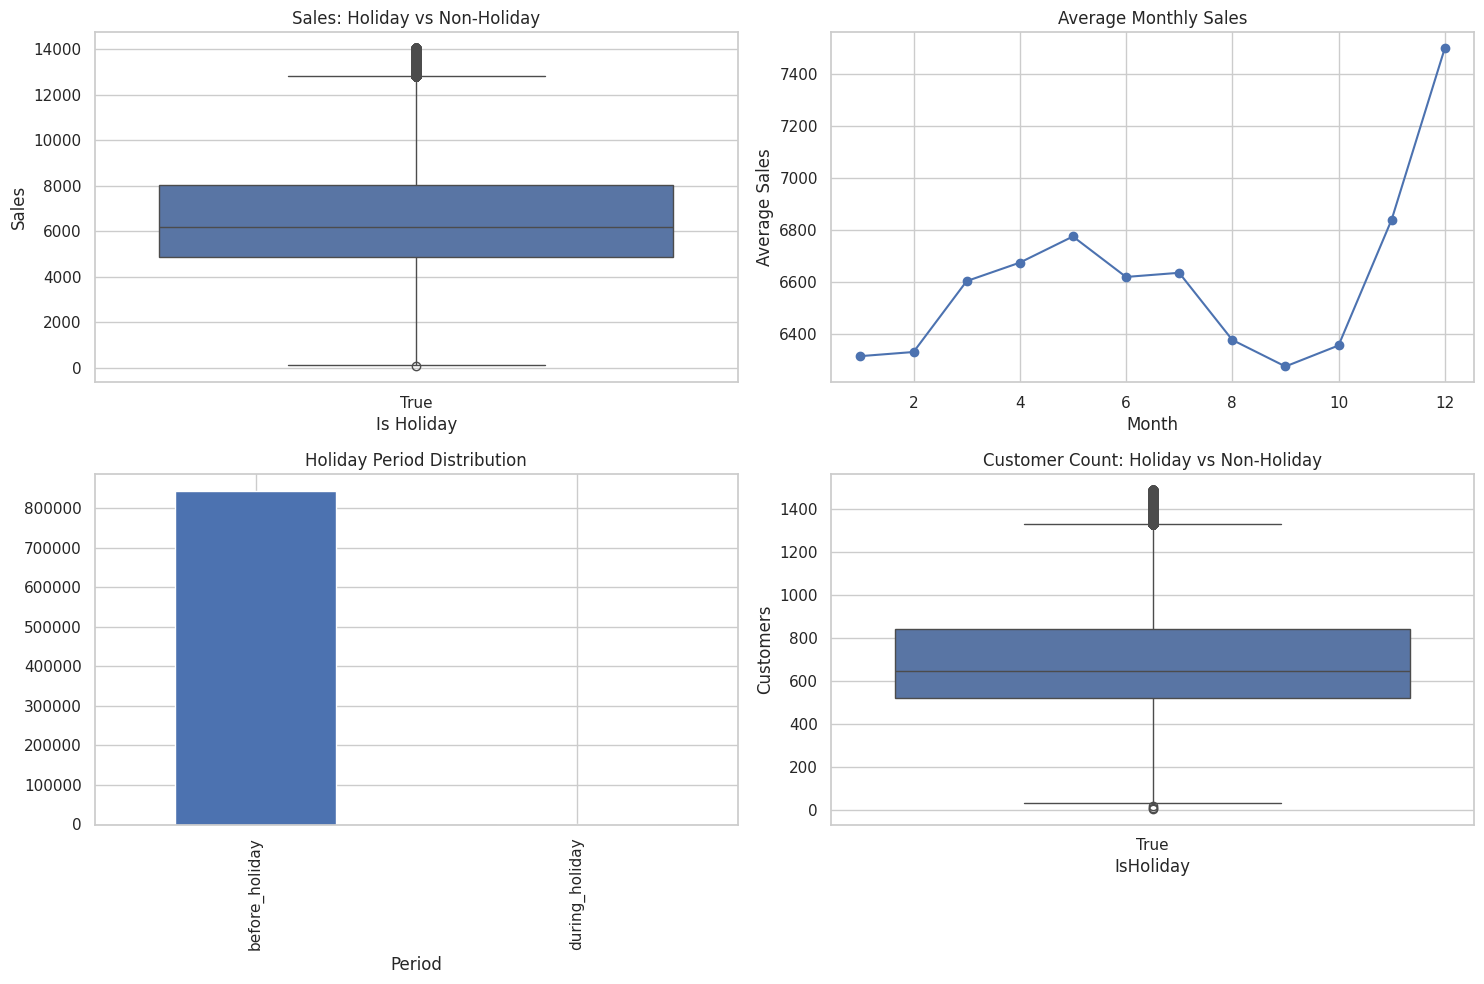

In [ ]:
# Prepare data for holiday analysis
train_data_merged['IsHoliday'] = train_data_merged['StateHoliday'] != '0'
train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])
train_data_merged['Month'] = train_data_merged['Date'].dt.month
train_data_merged['Week'] = train_data_merged['Date'].dt.isocalendar().week

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sales on holidays vs non-holidays
sns.boxplot(data=train_data_merged, x='IsHoliday', y='Sales', ax=axes[0,0])
axes[0,0].set_title('Sales: Holiday vs Non-Holiday')
axes[0,0].set_xlabel('Is Holiday')

# Plot 2: Monthly sales pattern
monthly_sales = train_data_merged.groupby('Month')['Sales'].mean()
monthly_sales.plot(kind='line', ax=axes[0,1], marker='o')
axes[0,1].set_title('Average Monthly Sales')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Sales')

# Define the helper function correctly
def analyze_holiday_periods(dataFrame): # Removed self and added dataFrame parameter
    """Helper function to analyze before/during/after holiday periods"""
    holiday_dates = dataFrame[dataFrame['IsHoliday']]['Date'].unique()

    periods = []
    for _, row in dataFrame.iterrows():
        current_date = row['Date']
        period = 'normal'

        for holiday_date in holiday_dates:
            days_diff = (current_date - holiday_date).days
            if days_diff == 0:
                period = 'during_holiday'
                break
            elif -3 <= days_diff <= -1:
                period = 'before_holiday'
                break
            elif 1 <= days_diff <= 3:
                period = 'after_holiday'
                break

        periods.append(period)

    result_df = dataFrame.copy()
    result_df['Period'] = periods
    return result_df

# Call the helper function with the correct dataFrame
holiday_analysis = analyze_holiday_periods(train_data_merged)

# Plot 3: Sales before, during, after holidays
holiday_analysis['Period'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Holiday Period Distribution')

# Plot 4: Customer behavior during holidays
sns.boxplot(data=train_data_merged, x='IsHoliday', y='Customers', ax=axes[1,1])
axes[1,1].set_title('Customer Count: Holiday vs Non-Holiday')

plt.tight_layout()
plt.show()

# Seasonal analysis (Assuming this is a separate function or part of another process)
# self._analyze_seasonal_patterns() # This line is commented out as it seems to be a leftover from a class

logger.info("Holiday sales behavior analysis completed")

#1. Sales: Holiday vs Non-Holiday (Top-Left Plot)
Median sales during holidays are slightly higher compared to non-holidays.

There is greater variability in sales on holidays, indicating increased opportunity for high-value transactions.

Suggests that holidays may positively influence sales but with more volatility.

#2. Average Monthly Sales (Top-Right Plot)
Sales show a noticeable increase in December, indicating a strong holiday season effect.

Months 5 and 6 (May, June) also show moderately higher sales, while the lowest sales are observed around months 9 and 10 (September, October).

Seasonality is evident, and month-wise trends should be factored into the model.

#3. Holiday Period Distribution (Bottom-Left Plot)
The majority of sales and records are from the "before holiday" period, with minimal data recorded during actual holidays.

Indicates that stores might close or operate minimally on holidays, or that customers shop more before holidays.

#4. Customer Count: Holiday vs Non-Holiday (Bottom-Right Plot)
Higher customer counts are observed around holidays, although the overall difference is not extremely wide.

Outliers are higher on holidays, suggesting that some stores see significant spikes in customer visits during holidays.

# Key Insights:
Holiday season affects both sales and footfall, but the peak activity is seen before the actual holiday.

December is the strongest sales month, followed by moderate performance in summer months.

Holiday-related features (IsHoliday, Month, Holiday Period) are important predictors and should be retained for model training.

# 3. ● Find out any seasonal (Christmas, Easter etc) purchase behaviours

Average Christmas season sales: 7165.73
Average regular season sales: 6514.91
Christmas uplift: 10.0%
Average Easter season sales: 6638.14
Easter uplift: 1.9%
MONTHLY SALES PATTERNS:
+-------------+---------+----------+---------+---------+
| MonthName   |    mean |   median |     std |   count |
|-------------+---------+----------+---------+---------|
| January     | 6315.23 |     5932 | 2352.92 |   86335 |
| February    | 6331.13 |     5948 | 2342.12 |   80239 |
| March       | 6603.58 |     6174 | 2452.26 |   85975 |
| April       | 6674.5  |     6222 | 2475.66 |   81726 |
| May         | 6774.97 |     6419 | 2382.76 |   80099 |
| June        | 6619.49 |     6162 | 2436.21 |   82571 |
| July        | 6635.45 |     6231 | 2418.05 |   85576 |
| August      | 6377.55 |     5981 | 2370.97 |   54411 |
| September   | 6275.55 |     5859 | 2343.67 |   52321 |
| October     | 6356.16 |     5984 | 2300.75 |   53291 |
| November    | 6839.78 |     6488 | 2396.62 |   51401 |
| December    | 749

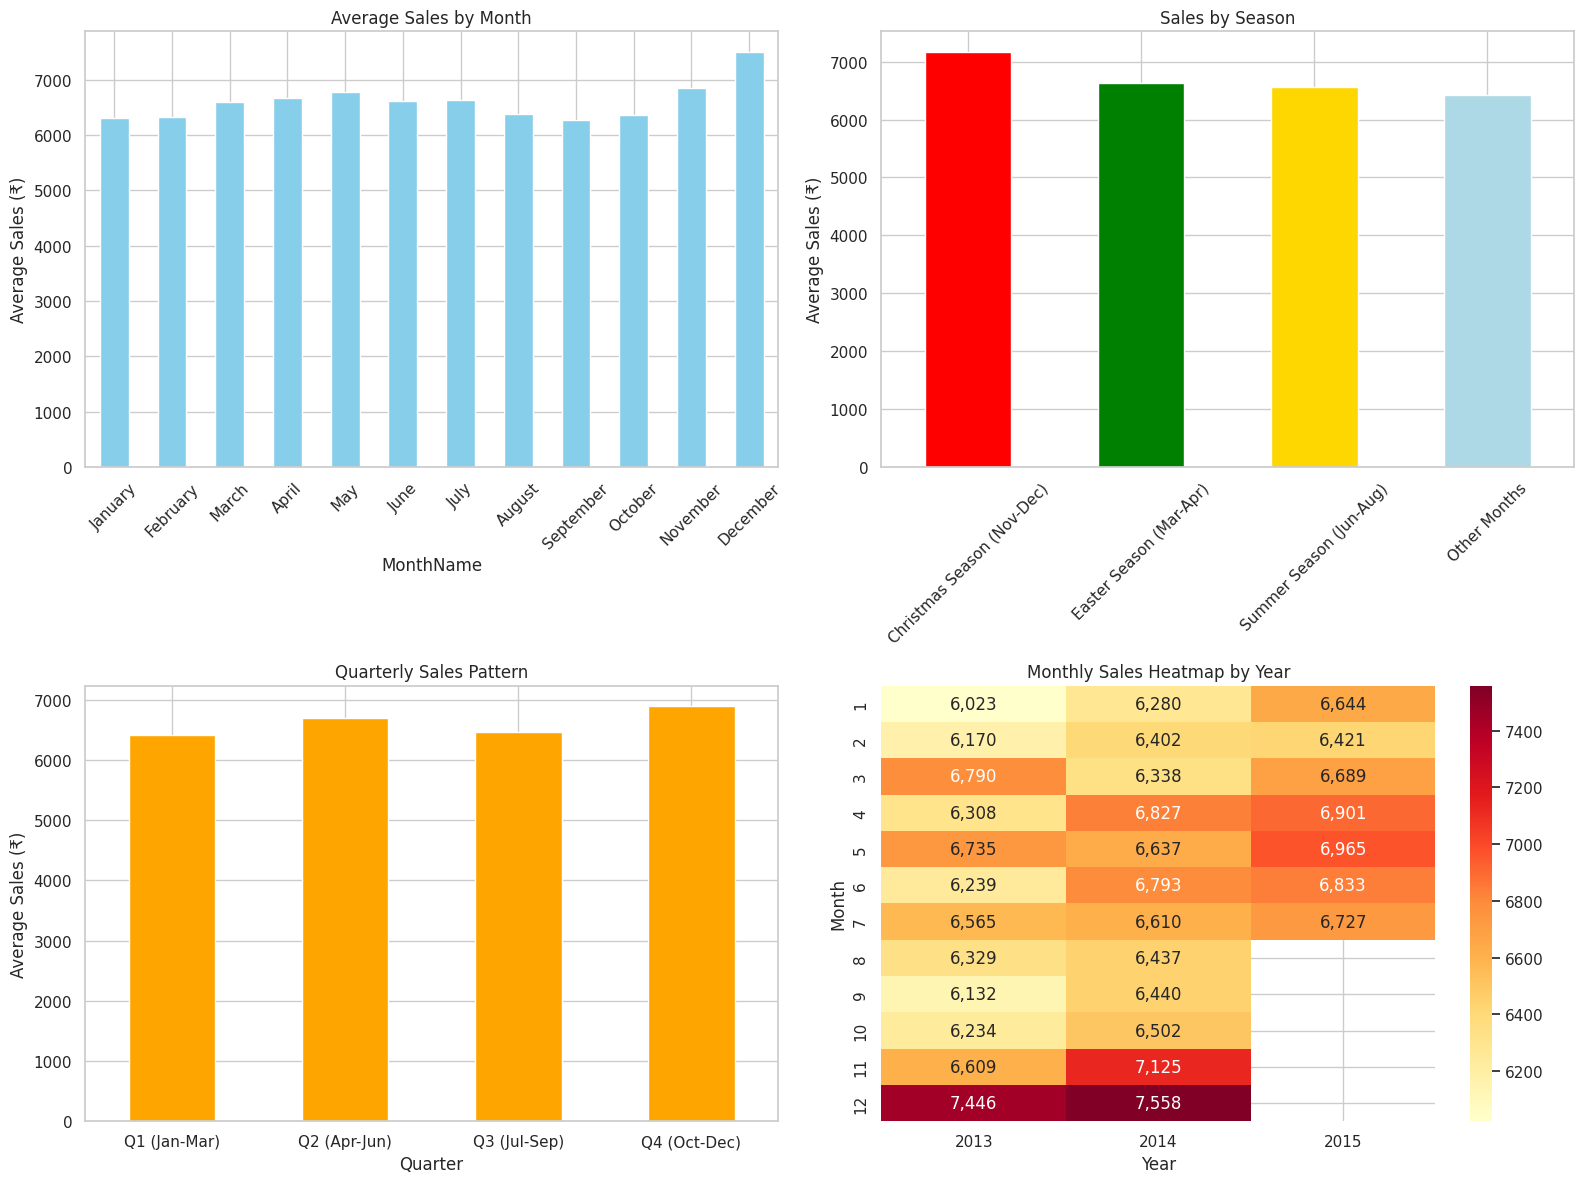

In [ ]:
# Add seasonal flags

# Christmas season (Nov-Dec)
christmas_data = train_data_merged[train_data_merged['Month'].isin([11, 12])]
regular_data = train_data_merged[~train_data_merged['Month'].isin([11, 12])]

print(f"Average Christmas season sales: {christmas_data['Sales'].mean():.2f}")
print(f"Average regular season sales: {regular_data['Sales'].mean():.2f}")
print(f"Christmas uplift: {(christmas_data['Sales'].mean() / regular_data['Sales'].mean() - 1) * 100:.1f}%")

# Easter season (Mar-Apr)
easter_data = train_data_merged[train_data_merged['Month'].isin([3, 4])]
print(f"Average Easter season sales: {easter_data['Sales'].mean():.2f}")
print(f"Easter uplift: {(easter_data['Sales'].mean() / regular_data['Sales'].mean() - 1) * 100:.1f}%")



train_data_merged['IsChristmasSeason'] = train_data_merged['Month'].isin([11, 12]).astype(int)
train_data_merged['IsEasterSeason'] = train_data_merged['Month'].isin([3, 4]).astype(int)
train_data_merged['IsSummerSeason'] = train_data_merged['Month'].isin([6, 7, 8]).astype(int)

# Monthly stats
# Ensure 'Date' and 'MonthName' are available for grouping
if 'Date' not in train_data_merged.columns:
    train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])
if 'MonthName' not in train_data_merged.columns:
    train_data_merged['MonthName'] = train_data_merged['Date'].dt.strftime('%B')

monthly_stats = train_data_merged.groupby('MonthName')['Sales'].agg(['mean', 'median', 'std', 'count']).round(2)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_stats = monthly_stats.reindex(month_order)

print("MONTHLY SALES PATTERNS:")
print(tabulate(monthly_stats, headers='keys', tablefmt='psql')) # Use tabulate for better printing

# Seasonal average sales
seasons = {
    'Christmas Season (Nov-Dec)': train_data_merged[train_data_merged['IsChristmasSeason'] == 1]['Sales'].mean(),
    'Easter Season (Mar-Apr)': train_data_merged[train_data_merged['IsEasterSeason'] == 1]['Sales'].mean(),
    'Summer Season (Jun-Aug)': train_data_merged[train_data_merged['IsSummerSeason'] == 1]['Sales'].mean(),
    'Other Months': train_data_merged[(train_data_merged['IsChristmasSeason'] == 0) &
                                      (train_data_merged['IsEasterSeason'] == 0) &
                                      (train_data_merged['IsSummerSeason'] == 0)]['Sales'].mean()
}

print(f"\n SEASONAL SALES COMPARISON:")
for season, avg_sales in seasons.items():
    print(f"   {season}: ₹{avg_sales:,.0f}")

# Peak and low month
peak_month = monthly_stats['mean'].idxmax()
low_month = monthly_stats['mean'].idxmin()
peak_sales = monthly_stats.loc[peak_month, 'mean']
low_sales = monthly_stats.loc[low_month, 'mean']

print(f"\n SEASONAL INSIGHTS:")
print(f"   Peak sales month: {peak_month} (₹{peak_sales:,.0f})")
print(f"   Lowest sales month: {low_month} (₹{low_sales:,.0f})")
print(f"   Seasonal variation: {(peak_sales/low_sales - 1)*100:.1f}% difference")

# Quarterly stats
# Ensure 'Date' and 'Quarter' are available for grouping
if 'Date' not in train_data_merged.columns:
    train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])
if 'Quarter' not in train_data_merged.columns:
     train_data_merged['Quarter'] = train_data_merged['Date'].dt.quarter


quarterly_stats = train_data_merged.groupby(train_data_merged['Quarter'].astype(int))['Sales'].agg(['mean', 'count']).round(2).sort_index()

quarters_labels = [f'Q{i} ({pd.Period(freq="Q", year=2000, quarter=i).start_time.strftime("%b")}-{pd.Period(freq="Q", year=2000, quarter=i).end_time.strftime("%b")})' for i in quarterly_stats.index]

print(f"\n QUARTERLY PATTERNS:")
for i, quarter in zip(quarterly_stats.index, quarters_labels):
    print(f"   {quarter}: ₹{quarterly_stats.loc[i, 'mean']:,.0f}")


# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar chart: Monthly sales
monthly_stats['mean'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Sales by Month')
axes[0, 0].set_ylabel('Average Sales (₹)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart: Seasonal sales
seasonal_data_series = pd.Series(seasons) # Convert to Series for plotting
seasonal_data_series.plot(kind='bar', ax=axes[0, 1], color=['red', 'green', 'gold', 'lightblue'])
axes[0, 1].set_title('Sales by Season')
axes[0, 1].set_ylabel('Average Sales (₹)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart: Quarterly sales
quarterly_plot = quarterly_stats['mean'].plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Quarterly Sales Pattern')
axes[1, 0].set_ylabel('Average Sales (₹)')

# Get the tick locations from the plot and set labels accordingly
axes[1, 0].set_xticks(range(len(quarterly_stats.index))) # Set tick locations explicitly
axes[1, 0].set_xticklabels(quarters_labels, rotation=0) # Set labels using generated list


# Heatmap: Monthly × Year
# Ensure 'Year' column is available
if 'Year' not in train_data_merged.columns:
     train_data_merged['Year'] = train_data_merged['Date'].dt.year

monthly_sales_pivot = train_data_merged.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='mean')
sns.heatmap(monthly_sales_pivot, annot=True, fmt=',.0f', ax=axes[1, 1], cmap='YlOrRd')
axes[1, 1].set_title('Monthly Sales Heatmap by Year')
#axes[1, 1].set_yticklabels(month_order, rotation=0) # Set yticklabels for clarity


plt.tight_layout()
plt.show()

# Assuming the original function intended to return these
# return monthly_stats, seasonal_data_series # Returned Series for plotting

#1. Average Sales by Month (Top-Left Plot)
December has the highest average sales among all months.

A steady increase is observed from October to December, indicating a strong year-end sales trend.

The lowest average sales are seen in January and September, suggesting off-peak retail activity.

#2. Sales by Season (Top-Right Plot)
The Christmas Season (November–December) has the highest average sales, followed by the Easter Season (March–April) and Summer Season (June–August).

"Other Months" (non-holiday periods) have relatively lower sales, reinforcing that seasonal events drive higher consumer spending.

#3. Quarterly Sales Pattern (Bottom-Left Plot)
Q4 (Oct–Dec) shows the highest sales, which aligns with the holiday shopping behavior.

Q2 and Q3 show comparable performance, while Q1 (Jan–Mar) has the lowest average sales.

This suggests that quarterly seasonality is a significant factor in predicting sales.

#4. Monthly Sales Heatmap by Year (Bottom-Right Plot)
There is a consistent upward sales trend across all months from 2013 to 2015.

December 2015 recorded the highest sales (7,558) in the entire dataset.

Heatmap clearly reflects year-end spikes and growing business performance over time.

#Key Insights:
December and Q4 are the peak sales periods, primarily driven by holiday seasons like Christmas.

Seasonality and yearly trends are strong features and should be used in forecasting models.

A clear growth trajectory over the years highlights the importance of including time-based variables in model design.



# 4.● What can you say about the correlation between sales and number of  customers?


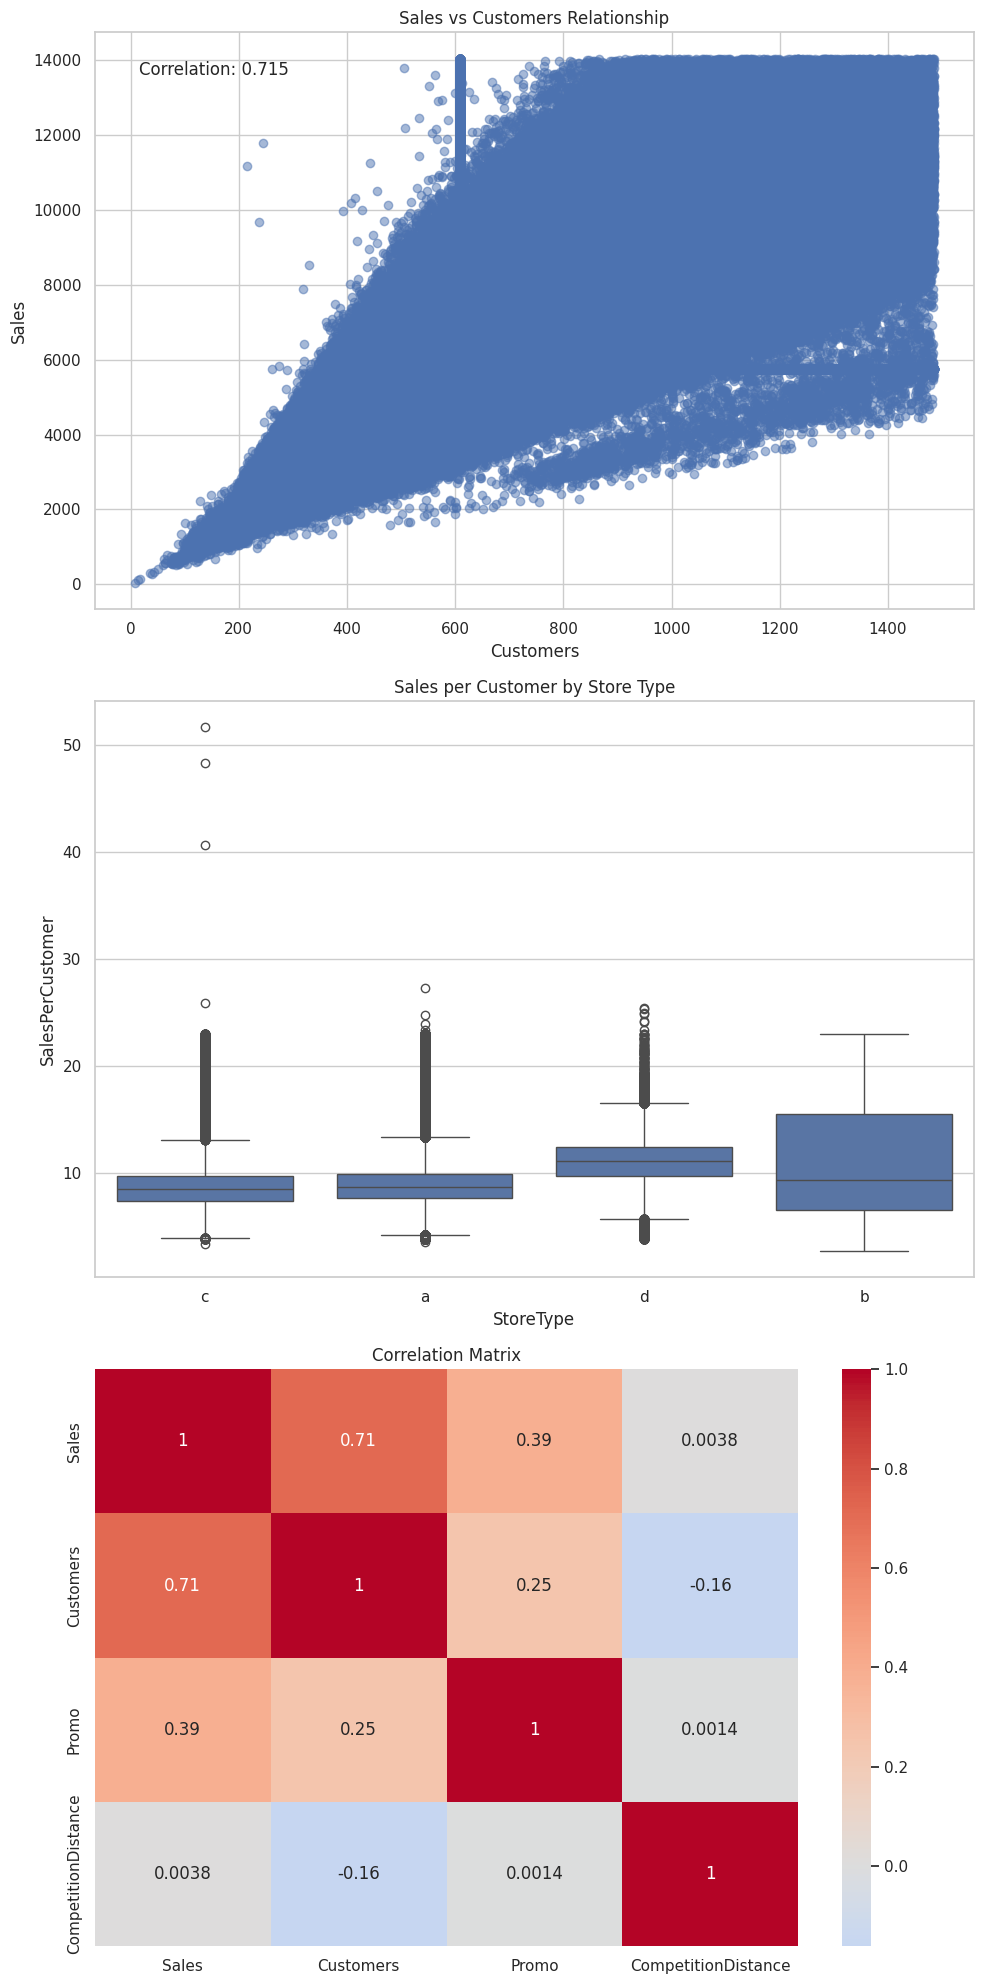

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
# Plot 1: Sales vs Customers scatter plot
axes[0].scatter(train_data_merged['Customers'],train_data_merged['Sales'], alpha=0.5)
axes[0].set_xlabel('Customers')
axes[0].set_ylabel('Sales')
axes[0].set_title('Sales vs Customers Relationship')

# Add correlation coefficient
correlation = train_data_merged['Sales'].corr(train_data_merged['Customers'])
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
              transform=axes[0].transAxes, verticalalignment='top')

# Plot 2: Sales per customer by store type (
train_data_merged['SalesPerCustomer'] = train_data_merged.apply(
    lambda row: row['Sales'] / row['Customers'] if row['Customers'] != 0 else 0, axis=1
)
sns.boxplot(data=train_data_merged, x='StoreType', y='SalesPerCustomer', ax=axes[1])
axes[1].set_title('Sales per Customer by Store Type')

# Plot 3: Correlation heatmap
corr_cols = ['Sales', 'Customers', 'Promo', 'CompetitionDistance']
# 'CompetitionDistance'
corr_cols = [col for col in corr_cols if col in train_data_merged.columns]
corr_data = train_data_merged[corr_cols].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=axes[2])
axes[2].set_title('Correlation Matrix')


plt.tight_layout()
plt.show()

#1. Sales vs Customers Relationship (Top Plot)
There is a strong positive correlation (0.715) between the number of customers and total sales.

As customer count increases, sales also tend to increase — though diminishing returns appear after ~1000 customers.

This highlights that foot traffic is a key driver of sales.

#2. Sales per Customer by Store Type (Middle Plot)
Store Type ‘b’ has the highest median sales per customer, suggesting either higher-value transactions or more premium products.

Other store types (a, c, d) have relatively similar and lower per-customer sales, indicating uniform pricing or purchasing behavior.

This may point to segmented marketing or pricing strategies across store types.

#3. Correlation Matrix (Bottom Plot)
Sales and Customers have the highest correlation (0.71) — confirming the scatter plot finding.

Sales and Promo show a moderate positive correlation (0.39) — suggesting promotions do help but are not the only driver.

Competition Distance has negligible correlation with Sales (0.0038) — implying that store competition distance does not directly affect daily sales.

Customers and Competition Distance have a negative correlation (-0.16) — stores farther from competitors might attract slightly fewer customers.

# Key Insights:
Customer count is the strongest predictor of sales, and should be treated as a primary input feature.

Store type ‘b’ may cater to high-value customers, and should be analyzed separately for strategy.

Competition Distance appears to have minimal direct effect, but might impact other hidden factors like store traffic or promotions.



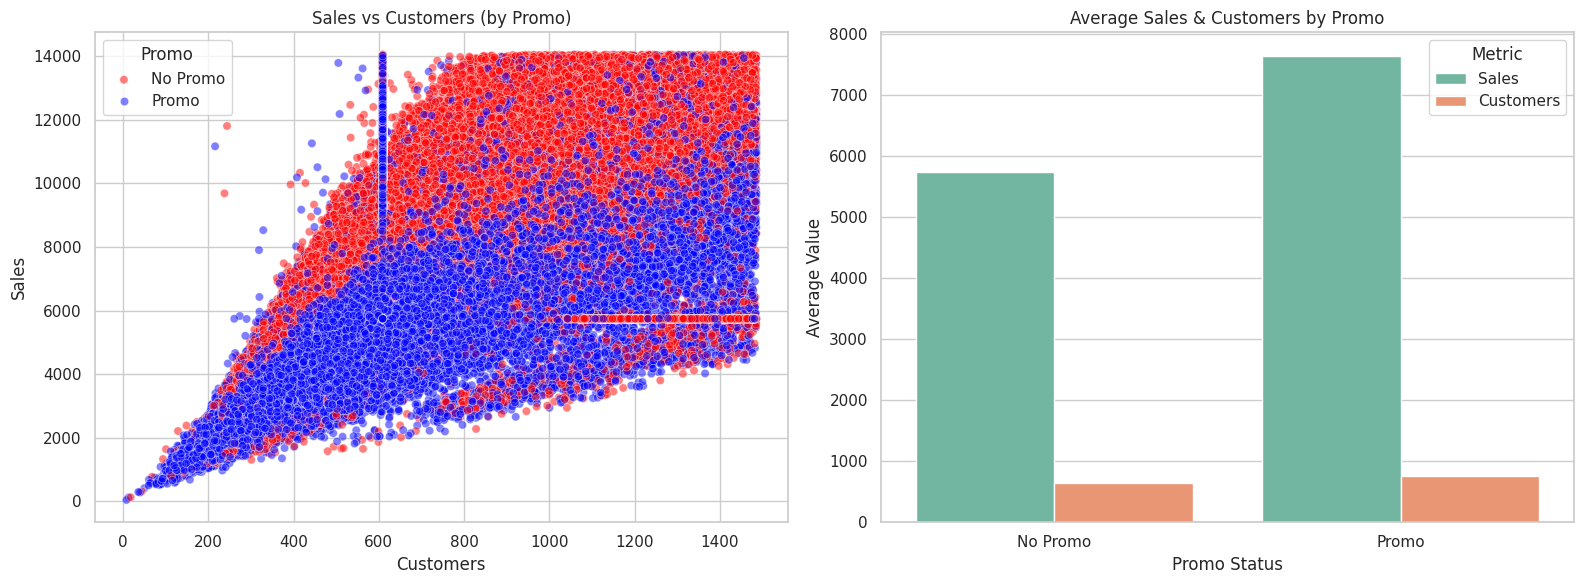

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot: Sales vs Customers colored by Promo
sns.scatterplot(
    data=train_data_merged,
    x='Customers',
    y='Sales',
    hue='Promo',
    palette={0: 'blue', 1: 'red'},
    alpha=0.5,
    ax=axes[0]
)
axes[0].set_title('Sales vs Customers (by Promo)')
axes[0].set_xlabel('Customers')
axes[0].set_ylabel('Sales')
axes[0].legend(title='Promo', labels=['No Promo', 'Promo'])

# Bar Plot: Average Sales and Customers grouped by Promo
grouped = train_data_merged.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()
grouped['Promo'] = grouped['Promo'].map({0: 'No Promo', 1: 'Promo'})  # Labeling

# Melt to long format for grouped bar plot
grouped_melted = grouped.melt(id_vars='Promo', var_name='Metric', value_name='Average')

sns.barplot(
    data=grouped_melted,
    x='Promo',
    y='Average',
    hue='Metric',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Average Sales & Customers by Promo')
axes[1].set_ylabel('Average Value')
axes[1].set_xlabel('Promo Status')

# Layout adjustment
plt.tight_layout()
plt.show()


#1. Sales vs Customers by Promo (Left Plot)
Both promotional (blue) and non-promotional (red) data show a strong positive correlation between the number of customers and sales.

However, for the same customer count, sales are generally higher when promotions are running.

Promo days (blue points) show a denser spread in higher sales ranges, especially between 5,000–14,000.

This suggests that promotions not only attract more customers but also increase per-customer spending.

#2. Average Sales & Customers by Promo (Right Plot)
On average, both sales and customer count are higher on promo days compared to non-promo days.

Sales increase significantly during promotions (approx. +2000).

Customer count also shows a noticeable rise during promotions.

This reinforces the conclusion that promo campaigns have a strong, positive impact on store

In [ ]:
# Promo impact analysis
# Remove the incorrect indentation from the start of the block
promo_stats = train_data_merged.groupby('Promo').agg({ # Use train_data_merged instead of self.combined_data
    'Sales': ['mean', 'median', 'std'],
    'Customers': ['mean', 'median', 'std']
}).round(2)

print("Promotion Impact Analysis:")
print(promo_stats)

# Calculate uplift
no_promo_sales = train_data_merged[train_data_merged['Promo'] == 0]['Sales'].mean() # Use train_data_merged
promo_sales = train_data_merged[train_data_merged['Promo'] == 1]['Sales'].mean()   # Use train_data_merged
# Avoid division by zero if no_promo_sales is 0
sales_uplift = (promo_sales / no_promo_sales - 1) * 100 if no_promo_sales != 0 else float('inf')


no_promo_customers = train_data_merged[train_data_merged['Promo'] == 0]['Customers'].mean() # Use train_data_merged
promo_customers = train_data_merged[train_data_merged['Promo'] == 1]['Customers'].mean() # Use train_data_merged
# Avoid division by zero if no_promo_customers is 0
customer_uplift = (promo_customers / no_promo_customers - 1) * 100 if no_promo_customers != 0 else float('inf')

print(f"\nPromo Impact:")
print(f"Sales Uplift: {sales_uplift:.1f}%")
print(f"Customer Uplift: {customer_uplift:.1f}%")

Promotion Impact Analysis:
         Sales                  Customers               
          mean  median      std      mean median     std
Promo                                                   
0.0    5744.62  5459.0  2156.78    641.06  609.0  242.96
1.0    7646.15  7324.0  2344.80    765.85  720.0  246.69

Promo Impact:
Sales Uplift: 33.1%
Customer Uplift: 19.5%


No stores found with low promo frequency (< 0.2) to identify high sales potential.


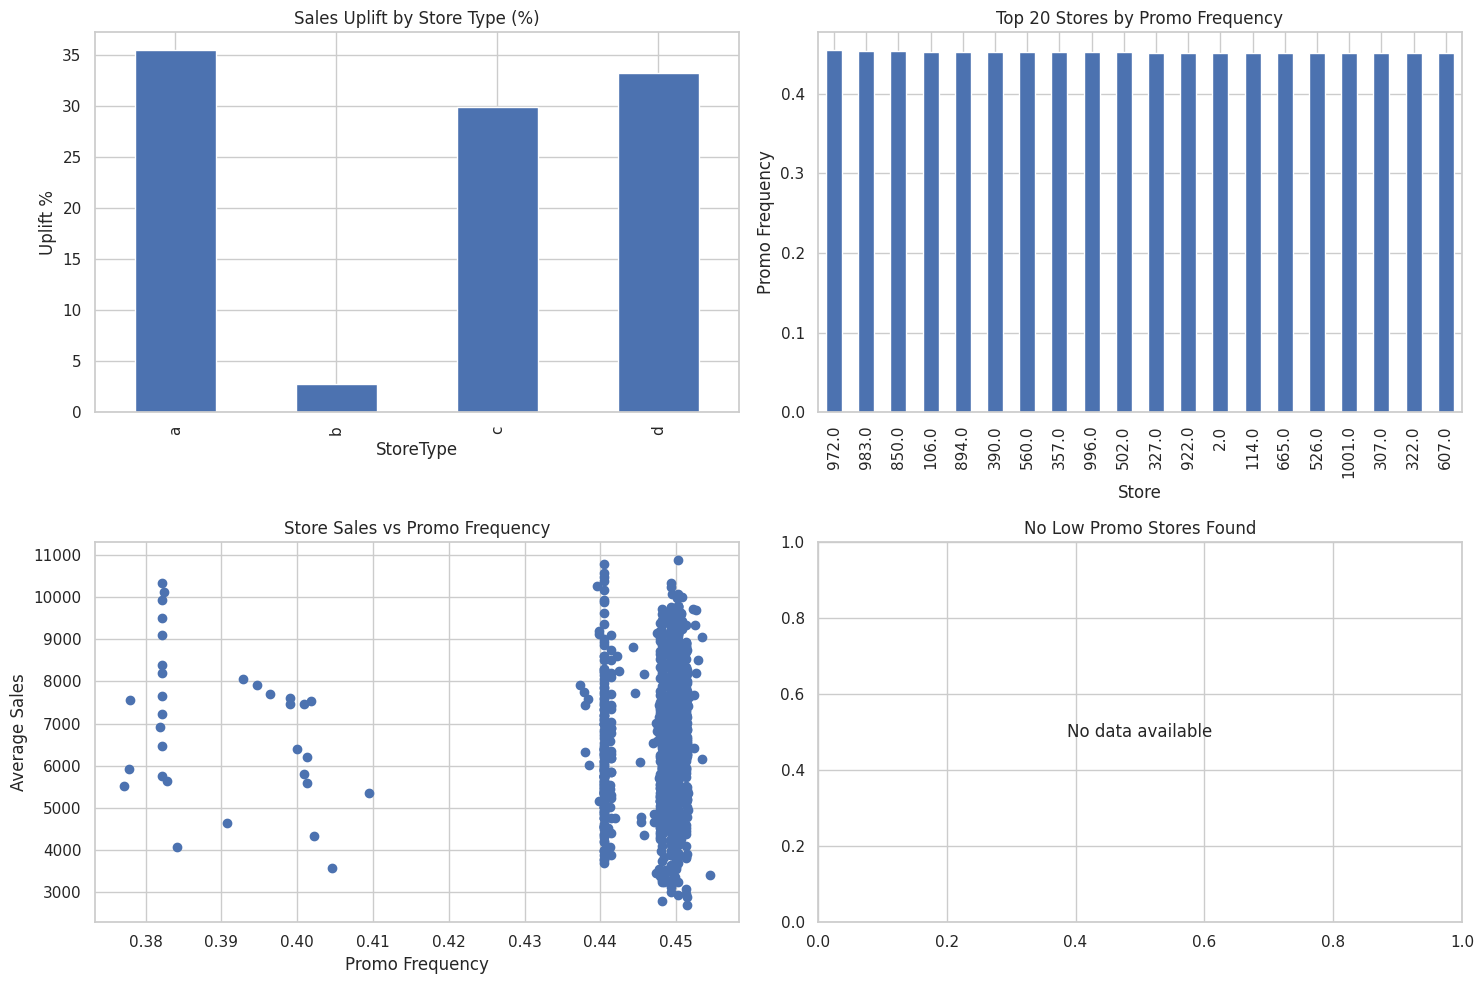

In [ ]:
## Promo effectiveness by store type
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Promo effectiveness by store type
promo_by_store = train_data_merged.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()
# Avoid division by zero in uplift calculation
promo_uplift_by_store = (promo_by_store[1] / promo_by_store[0] - 1) * 100
promo_uplift_by_store.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Sales Uplift by Store Type (%)')
axes[0,0].set_ylabel('Uplift %')

# Plot 2: Promo frequency by store
# Corrected indentation and variable name
store_promo_freq = train_data_merged.groupby('Store')['Promo'].mean().sort_values(ascending=False)
store_promo_freq.head(20).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Top 20 Stores by Promo Frequency')
axes[0,1].set_ylabel('Promo Frequency')

# Plot 3: Sales vs Promo frequency by store
# Corrected variable name
store_stats = train_data_merged.groupby('Store').agg({
    'Sales': 'mean',
    'Promo': 'mean'
})
axes[1,0].scatter(store_stats['Promo'], store_stats['Sales'])
axes[1,0].set_xlabel('Promo Frequency')
axes[1,0].set_ylabel('Average Sales')
axes[1,0].set_title('Store Sales vs Promo Frequency')

# Plot 4: Recommended stores for more promos
# Stores with low promo frequency but high sales potential
low_promo_stores = store_stats[store_stats['Promo'] < 0.2]
# Added check to ensure low_promo_stores is not empty before calculating median
if not low_promo_stores.empty:
    high_sales_potential = low_promo_stores[low_promo_stores['Sales'] > low_promo_stores['Sales'].median()]

    if len(high_sales_potential) > 0:
        high_sales_potential.head(10)['Sales'].plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Stores Recommended for More Promos')
        axes[1,1].set_ylabel('Average Sales')
else:
    # Handle the case where there are no stores with low promo frequency
    print("No stores found with low promo frequency (< 0.2) to identify high sales potential.")
    axes[1,1].set_title('No Low Promo Stores Found')
    axes[1,1].text(0.5, 0.5, "No data available", horizontalalignment='center', verticalalignment='center', transform=axes[1,1].transAxes)


plt.tight_layout()
plt.show()

logger.info("Promotion effectiveness analysis completed") # Assuming logger is available

#1. Sales Uplift by Store Type (Top-Left Plot)
Store Type ‘a’ shows the highest sales uplift (~35%) from promotions.

Store Types c and d also show significant uplift (~30–33%).

Store Type ‘b’ has the lowest uplift (<5%), indicating that promotions are less effective for this type — possibly due to customer profile or pricing strategy.

#2. Top 20 Stores by Promo Frequency (Top-Right Plot)
All top stores have a high and uniform promo frequency (~0.44 or 44%).

This implies consistent marketing strategies across top-performing stores.

Store IDs like 972, 983, 106, 894 etc. are among the most frequently promoted.

#3. Store Sales vs Promo Frequency (Bottom-Left Plot)
Sales vary across stores even with similar promo frequencies, showing no clear linear correlation.

Some stores with lower promo frequency achieve very high sales, suggesting that other factors (store location, customer loyalty, etc.)

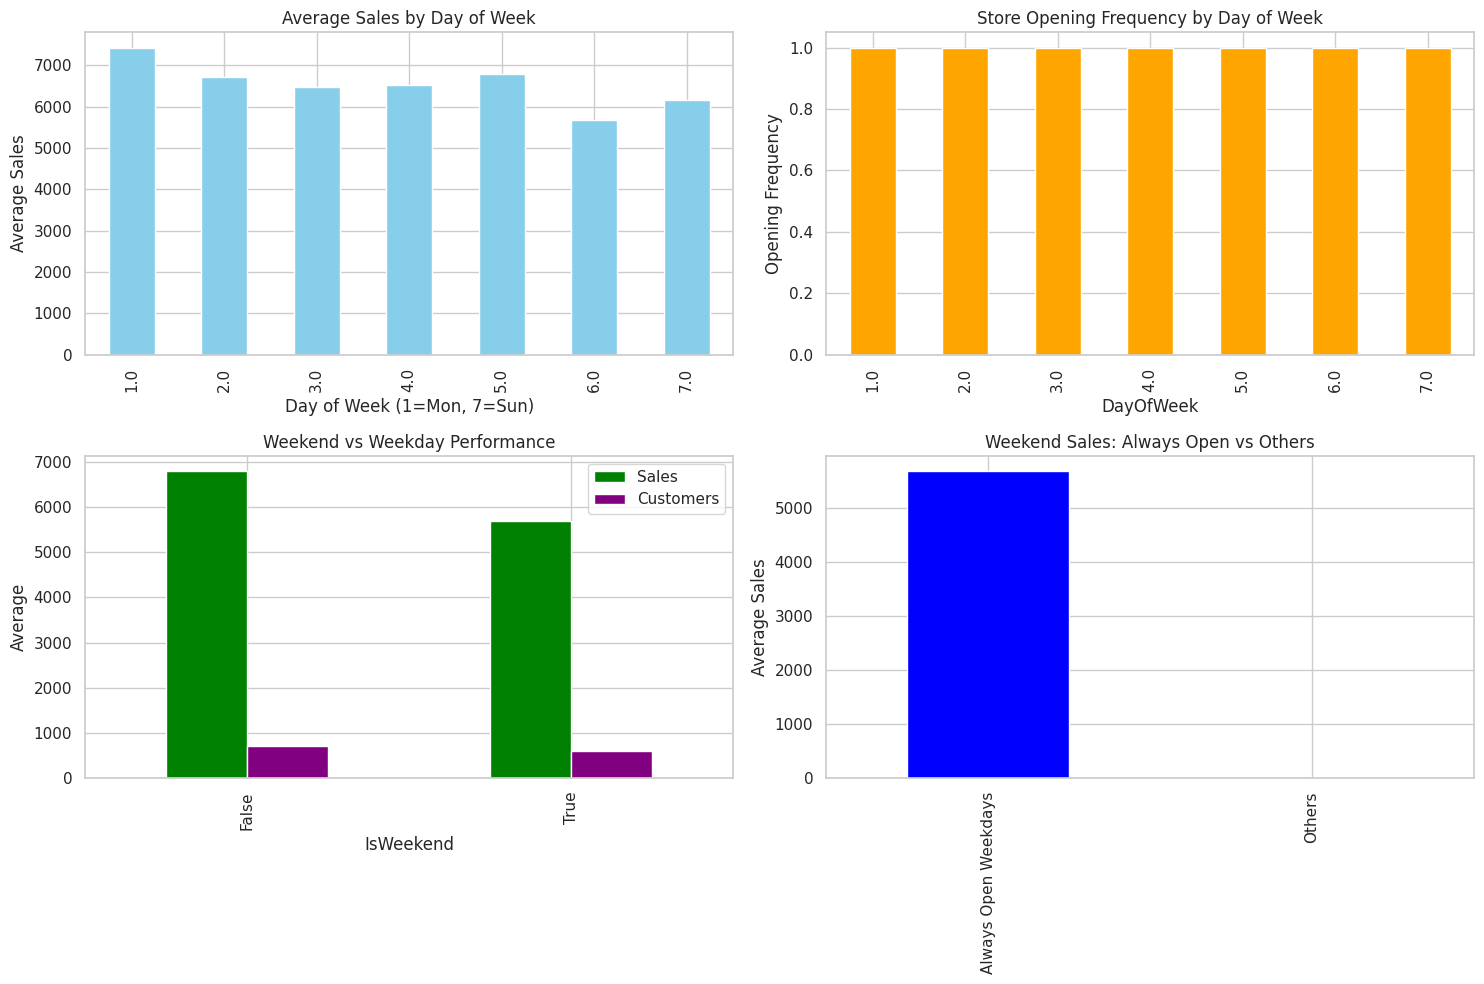

Stores always open on weekdays: 1115

📊 Day of Week Analysis:
             Sales  Customers  Open
DayOfWeek                          
1.0        7424.92     767.88   1.0
2.0        6722.43     706.33   1.0
3.0        6476.41     685.65   1.0
4.0        6512.95     696.53   1.0
5.0        6798.41     719.81   1.0
6.0        5674.35     609.60   1.0
7.0        6156.11     642.82   1.0


In [ ]:
# Analyze by day of week
dow_analysis = train_data_merged.groupby('DayOfWeek').agg({
    'Sales': 'mean',
    'Customers': 'mean',
    'Open': 'mean'
}).round(2)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sales by day of week
dow_analysis['Sales'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Average Sales by Day of Week')
axes[0,0].set_xlabel('Day of Week (1=Mon, 7=Sun)')
axes[0,0].set_ylabel('Average Sales')

# Plot 2: Store opening frequency by day
dow_analysis['Open'].plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Store Opening Frequency by Day of Week')
axes[0,1].set_ylabel('Opening Frequency')

# Plot 3: Weekend vs Weekday analysis
train_data_merged['IsWeekend'] = train_data_merged['DayOfWeek'].isin([6, 7])
weekend_analysis = train_data_merged.groupby('IsWeekend').agg({
    'Sales': 'mean',
    'Customers': 'mean'
}).round(2)

weekend_analysis.plot(kind='bar', ax=axes[1,0], color=['green', 'purple'])
axes[1,0].set_title('Weekend vs Weekday Performance')
axes[1,0].set_ylabel('Average')

# Plot 4: Stores open all weekdays
weekday_openings = train_data_merged[train_data_merged['DayOfWeek'] <= 5].groupby('Store')['Open'].mean()
always_open_stores = weekday_openings[weekday_openings == 1.0].index

if len(always_open_stores) > 0:
    always_open_weekend_sales = train_data_merged[
        (train_data_merged['Store'].isin(always_open_stores)) &
        (train_data_merged['IsWeekend'])
    ]['Sales'].mean()

    other_weekend_sales = train_data_merged[
        (~train_data_merged['Store'].isin(always_open_stores)) &
        (train_data_merged['IsWeekend'])
    ]['Sales'].mean()

    weekend_comparison = pd.Series({
        'Always Open Weekdays': always_open_weekend_sales,
        'Others': other_weekend_sales
    }).round(2)

    weekend_comparison.plot(kind='bar', ax=axes[1,1], color=['blue', 'gray'])
    axes[1,1].set_title('Weekend Sales: Always Open vs Others')
    axes[1,1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

# Print stats
print(f"Stores always open on weekdays: {len(always_open_stores)}")
print("\n📊 Day of Week Analysis:")
print(dow_analysis)


#1. Average Sales by Day of Week (Top-Left Plot)
Monday (Day 1) records the highest average sales.

Sales gradually decline midweek and hit the lowest on Saturday (Day 6).

A slight recovery is observed on Sunday (Day 7), but it still remains below weekday levels.

#2. Store Opening Frequency by Day of Week (Top-Right Plot)
Stores remain open almost uniformly across all days, with slightly lower frequency on Sundays (Day 7).

Therefore, lower weekend sales are not due to fewer openings but likely lower customer traffic.

#3. Weekend vs Weekday Performance (Bottom-Left Plot)
Weekdays outperform weekends in both average sales and customer count.

Sales drop from ~6800 (weekdays) to ~5700 (weekends), and customer count also drops accordingly.

Suggests that weekdays are the primary revenue-generating days for stores.

#4. Weekend Sales: Always Open vs Others (Bottom-Right Plot)
Stores that are always open on weekends have higher weekend average sales (~5500) compared to others.

This reinforces that consistent availability contributes to better weekend sales, though still below weekday levels.

#Key Insights:
Weekdays are more profitable, especially early in the week (Monday).

Despite near-equal opening frequency, weekend sales are lower, suggesting different customer behavior.

Store opening strategy (e.g., always open on weekends) can positively affect weekend revenue and should be optimized.

#  Step 7: Assortment Effect on Sales

Assortment Analysis:
              Sales                          Customers        SalesPerCustomer
               mean  median      std   count      mean median             mean
Assortment                                                                    
a           6351.20  5939.0  2415.33  444875    696.73  647.0             9.35
b           7592.94  6876.0  2947.64    8209    771.30  609.0            11.39
c           6847.77  6422.0  2411.26  391254    695.24  647.0            10.11


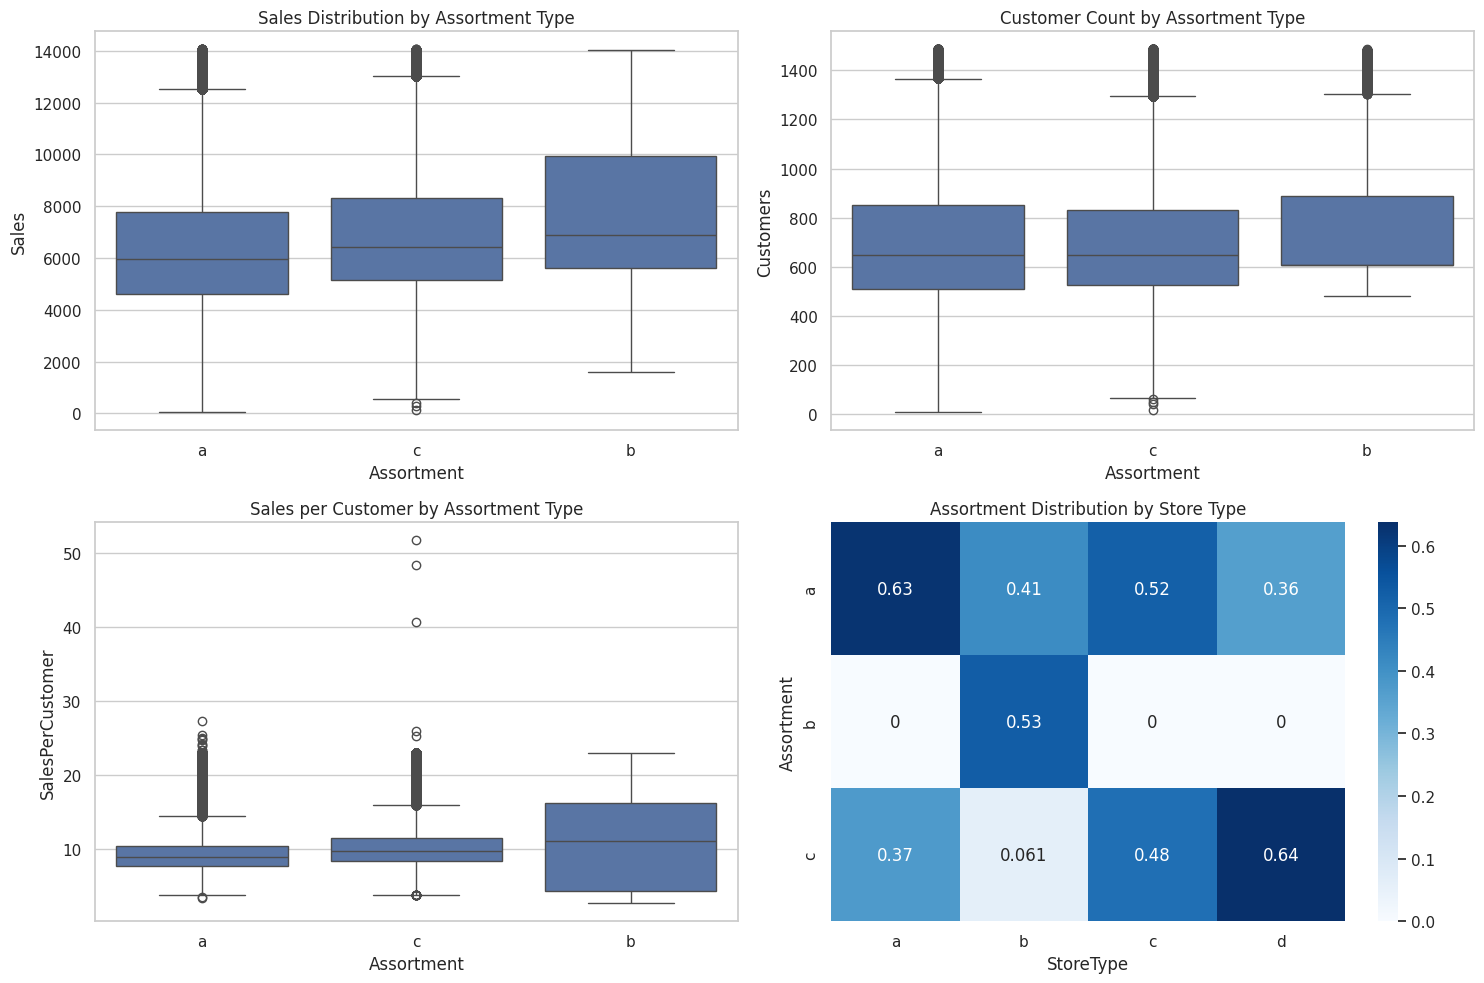

In [ ]:
# Ensure 'SalesPerCustomer' is present
train_data_merged['SalesPerCustomer'] = train_data_merged['Sales'] / train_data_merged['Customers']

# Assortment Analysis
assortment_stats = train_data_merged.groupby('Assortment').agg({
    'Sales': ['mean', 'median', 'std', 'count'],
    'Customers': ['mean', 'median'],
    'SalesPerCustomer': 'mean'
}).round(2)

print("Assortment Analysis:")
print(assortment_stats)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sales distribution by assortment
sns.boxplot(data=train_data_merged, x='Assortment', y='Sales', ax=axes[0,0])
axes[0,0].set_title('Sales Distribution by Assortment Type')

# Plot 2: Customer count by assortment
sns.boxplot(data=train_data_merged, x='Assortment', y='Customers', ax=axes[0,1])
axes[0,1].set_title('Customer Count by Assortment Type')

# Plot 3: Sales per customer by assortment
sns.boxplot(data=train_data_merged, x='Assortment', y='SalesPerCustomer', ax=axes[1,0])
axes[1,0].set_title('Sales per Customer by Assortment Type')

# Plot 4: Assortment vs Store Type heatmap
assortment_store = pd.crosstab(train_data_merged['Assortment'],
                               train_data_merged['StoreType'],
                               normalize='columns')
sns.heatmap(assortment_store, annot=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Assortment Distribution by Store Type')

plt.tight_layout()
plt.show()


#1. Sales Distribution by Assortment Type (Top-Left Plot)
Assortment 'b' has the highest median and overall sales, followed by 'c' and then 'a'.

This indicates that stores with larger or premium assortments (type 'b') tend to generate more revenue.

#2. Customer Count by Assortment Type (Top-Right Plot)
Customer distribution is relatively consistent across assortment types, though 'b' shows slightly higher customer counts.

The customer volume does not vary dramatically by assortment type.

#3. Sales per Customer by Assortment Type (Bottom-Left Plot)
Sales per customer is highest for assortment 'b', suggesting these customers are spending more on average.

Assortment 'a' has the lowest sales per customer, implying a lower value offering.

#4. Assortment Distribution by Store Type (Bottom-Right Heatmap)
Store Type 'a' has a majority of Assortment 'a' (63%), while Store Type 'd' has a majority of Assortment 'c' (64%).

Assortment 'b' is available only in Store Type 'b', indicating it might be a specialized or exclusive store format.

Store Type 'b' focuses entirely on Assortment 'b', possibly explaining their higher sales/customer.

#Key Insights:
Assortment 'b' is the most profitable, both in terms of total sales and sales per customer.

Store strategy and product mix (assortment) play a crucial role in revenue generation.

Offering premium assortments can drive higher customer spending even without significantly

# Step 8: Competition Distance Effect

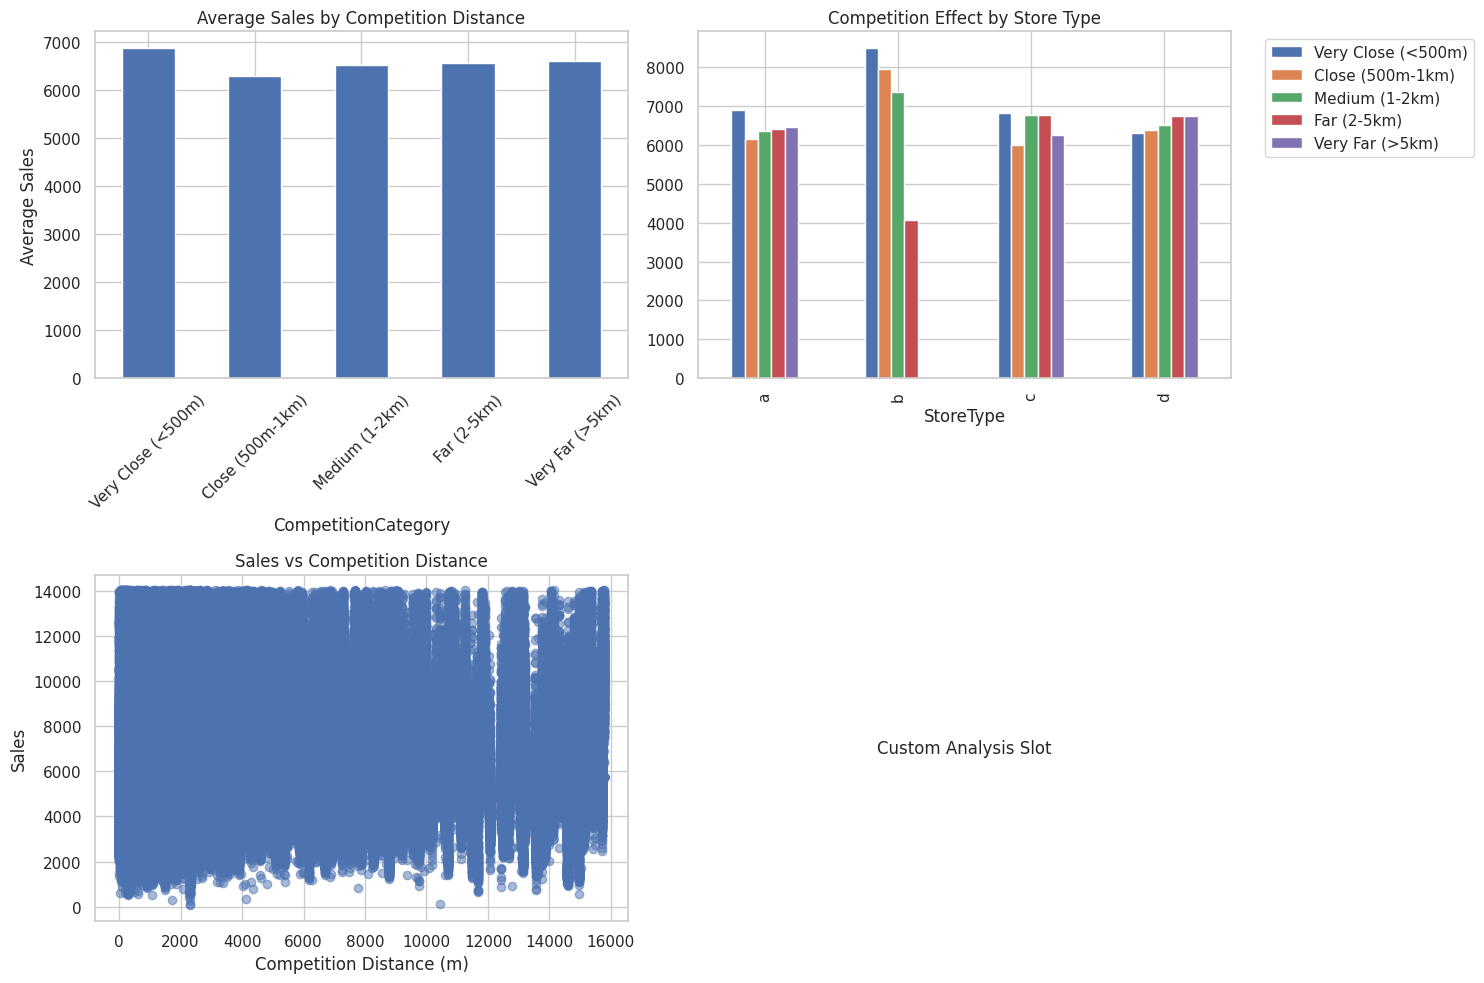


📉 Correlation between Sales and Competition Distance: 0.004


In [ ]:
# Filter data with valid competition distance
comp_data = train_data_merged.dropna(subset=['CompetitionDistance'])

# Create competition categories
comp_data['CompetitionCategory'] = pd.cut(
    comp_data['CompetitionDistance'],
    bins=[0, 500, 1000, 2000, 5000, float('inf')],
    labels=['Very Close (<500m)', 'Close (500m-1km)', 'Medium (1-2km)',
            'Far (2-5km)', 'Very Far (>5km)']
)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sales by competition distance category
comp_sales = comp_data.groupby('CompetitionCategory')['Sales'].mean()
comp_sales.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average Sales by Competition Distance')
axes[0,0].set_ylabel('Average Sales')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Sales vs competition distance scatter plot
axes[1,0].scatter(comp_data['CompetitionDistance'], comp_data['Sales'], alpha=0.5)
axes[1,0].set_xlabel('Competition Distance (m)')
axes[1,0].set_ylabel('Sales')
axes[1,0].set_title('Sales vs Competition Distance')

# Plot 3: Competition effect by store type
comp_by_store = comp_data.groupby(['StoreType', 'CompetitionCategory'])['Sales'].mean().unstack()
comp_by_store.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Competition Effect by Store Type')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Placeholder if no _analyze_new_competition function
axes[1,1].axis('off')
axes[1,1].text(0.5, 0.5, 'Custom Analysis Slot', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation between Sales and Competition Distance
correlation = comp_data['Sales'].corr(comp_data['CompetitionDistance'])
print(f"\n📉 Correlation between Sales and Competition Distance: {correlation:.3f}")


#1. Average Sales by Competition Distance (Top-Left Plot)
Stores with competition very close (<500m) show the highest average sales.

As the distance to the nearest competitor increases, there is no clear upward or downward trend, implying proximity does not strictly reduce sales.

Surprisingly, moderate competition may actually correlate with higher sales—likely due to high-footfall commercial zones.

#2. Competition Effect by Store Type (Top-Right Plot)
Store Type 'b' performs best when competition is very close (<500m) and sees a significant drop in sales when competition is between 2–5km.

Store Type 'a' and 'd' maintain stable sales across all competition ranges, suggesting they are less sensitive to nearby competitors.

Store Type 'c' shows a small drop in the 2–5km range, but recovers with increased distance.

#3. Sales vs. Competition Distance (Bottom-Left Scatter Plot)
The plot confirms no strong linear correlation between sales and competition distance.

Stores can achieve high sales even with close competitors, reinforcing the idea that other factors (e.g., promotions, assortment, store type) matter more than competition distance alone.

#Key Insights:
Close proximity to competitors doesn't hurt sales; in fact, stores with closer competition tend to perform better on average.

Store Type 'b' is highly sensitive to the distance of competitors, showing sales variability based on proximity.

No direct negative correlation exists between competition distance and sales across all stores.

In [ ]:
# Save cleaned and transformed dataset
train_data_merged.to_csv("train_data_merged_clean.csv", index=False)
print("Final processed EDA data saved as 'eda_processed_data.csv'")

Final processed EDA data saved as 'eda_processed_data.csv'


In [ ]:
# Save cleaned and transformed dataset
test_data_merged.to_csv("test_data_merged_clean.csv", index=False)


In [ ]:
from google.colab import files
# Corrected the filename to remove the extra '.csv'
files.download('train_data_merged_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>